In [1]:
#external packages
import numpy as np
import math
from astropy import units as u
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import time
from numpy.lib.recfunctions import append_fields
from astropy.cosmology import FlatLambdaCDM,Planck15
from matplotlib.backends.backend_pdf import PdfPages
import sys
import random
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
%load_ext autoreload

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

sys.path.append('/home/almhatre/data')

import AGNclustering.kNN_functions as k
from AGNclustering.KNN_stuff import CDFkNN_rp_pi
from AGNclustering.kNN_error import generate_distinct_colors, kNN_ratio_error, block_test, kNN_chi_squared,kNN_diff_error,chop_cdf, angular_chop_cdf
from AGNclustering.utils import z_to_cdist
from AGNclustering.wppi_utils import control_mult_var,control_var
from AGNclustering.angular_kNN import CDFkNN_theta
import AGNclustering.BASS_randoms as rand

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
data_directory = '/home/almhatre/data/BASS/'
cat = Table.read(data_directory + 'data_dr2.csv',format='csv')
agnt =np.array(cat)
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
t = Table.read(data_directory +'2mrs_noAGN.csv',format='csv')
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN

# Setup for Plots that use entire redshift range

In [36]:
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN

div = 33
redshift0 = 0
redshift33 = np.percentile(agn['z'], div)
redshift66 = np.percentile(agn['z'], div*2)
redshift99 = np.percentile(agn['z'], 100)

nonzero = ( (agn['z'] > redshift0) & (agn['z'] <= redshift33) )
lowredshift = agn[nonzero]

nonzero = ( (agn['z'] > redshift33) & (agn['z'] <= redshift66) )
midredshift = agn[nonzero]

nonzero = ( (agn['z'] > redshift66) & (agn['z'] <= redshift99) )
highredshift = agn[nonzero]

zmin = (lowredshift['z'].min())
zmax = (midredshift['z'].max())

gal=gal[(gal['z']>zmin)&(gal['z']<=zmax)]

agnmass = lowredshift
agnmass= np.append(agnmass,midredshift)

# AGN Catalog vs. Randoms Plot + Covariance Matrix

Using sensitivity maps for 70 month survey
number of randoms: 697


464

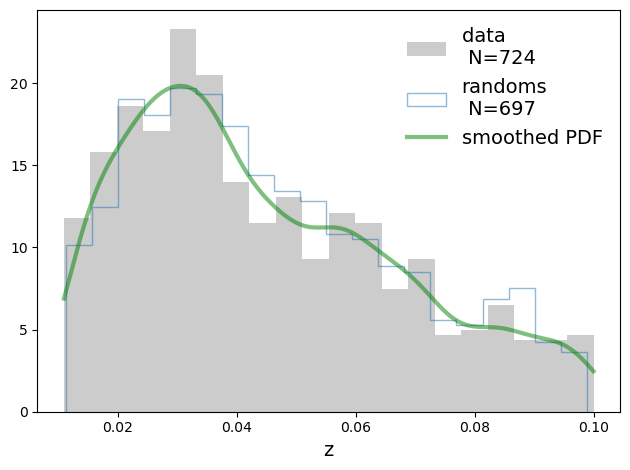

In [37]:
arand = rand.genrand(agn,1.2,cosmo,width=.2,scoords='galactic',use_BASS_sens_map=True,\
                     data_path=data_directory,plot=True,plot_filename=None)
nonzero = (arand['z']<0.053)
arand=arand[nonzero]
len(arand)

In [38]:
kneighbors = np.array([1,2,3,4,5,6,7])

degree_min = 0
degree_max = 1

anglestemp = np.linspace(degree_min*np.pi/180.0, degree_max*np.pi/180.0, 6)

angles = anglestemp[:-1]
angles = angles[1:]

linear_angle_adjust = 0
outputhightemp, errhightemp, covhigh = k.angular_kNN_wrapper(anglestemp, agnmass, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)
outputlowtemp, errlowtemp, covlow =  k.angular_kNN_wrapper(anglestemp, arand, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)

outputhigh = np.delete(outputhightemp, -1, axis=1)
outputhigh = np.delete(outputhigh, 0, axis=1)
errhigh = np.delete(errhightemp, -1, axis=1)
errhigh = np.delete(errhigh, 0, axis=1)


outputlow = np.delete(outputlowtemp, -1, axis=1)
outputlow = np.delete(outputlow, 0, axis=1)
errlow = np.delete(errlowtemp, -1, axis=1)
errlow = np.delete(errlow, 0, axis=1)

Ngal 34026 Nrand 479 7
build tree 0.026933908462524414
query 0.013776063919067383
  kdtree tot 0.04074573516845703
(479, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0008437633514404297
Ngal 34026 Nrand 479 7
build tree 0.021524667739868164
query 0.013976812362670898
  kdtree tot 0.03553628921508789
(479, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0007560253143310547
Ngal 34026 Nrand 479 7
build tree 0.020990610122680664
query 0.013862848281860352
  kdtree tot 0.034883975982666016
(479, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0007197856903076172
Ngal 34026 Nrand 479 7
build tree 0.019882678985595703
query 0.013254404067993164
  kdtree tot 0.033165693283081055
(479, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006880760192871094
Ngal 34026 Nrand 479 7
build tree 0.01995396614074707
query 0.01271390

build tree 0.017789125442504883
query 0.011699676513671875
  kdtree tot 0.029536962509155273
(461, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006797313690185547
Ngal 32395 Nrand 461 7
build tree 0.017333507537841797
query 0.011380195617675781
  kdtree tot 0.028741121292114258
(461, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006556510925292969
Ngal 32395 Nrand 461 7
build tree 0.017354965209960938
query 0.011594533920288086
  kdtree tot 0.0289766788482666
(461, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006620883941650391
6 / 49
Ngal 33152 Nrand 462 7
build tree 0.01765894889831543
query 0.011036872863769531
  kdtree tot 0.028724193572998047
(462, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006811618804931641
Ngal 33152 Nrand 462 7
build tree 0.017562389373779297
query 0.011011838912963867
  kdt

build tree 0.018717288970947266
query 0.011512517929077148
  kdtree tot 0.030284881591796875
(462, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0007762908935546875
Ngal 32848 Nrand 462 7
build tree 0.018543720245361328
query 0.011204242706298828
  kdtree tot 0.02977585792541504
(462, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006866455078125
Ngal 32848 Nrand 462 7
build tree 0.01744246482849121
query 0.010805368423461914
  kdtree tot 0.0282745361328125
(462, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006661415100097656
Ngal 32848 Nrand 462 7
build tree 0.017873525619506836
query 0.01080012321472168
  kdtree tot 0.028701066970825195
(462, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006844997406005859
12 / 49
Ngal 33397 Nrand 465 7
build tree 0.018072843551635742
query 0.011343002319335938
  kdtree 

query 0.011894941329956055
  kdtree tot 0.02992415428161621
(468, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.001039266586303711
Ngal 33400 Nrand 468 7
build tree 0.018126249313354492
query 0.011624574661254883
  kdtree tot 0.029778242111206055
(468, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006847381591796875
Ngal 33400 Nrand 468 7
build tree 0.01763629913330078
query 0.011609792709350586
  kdtree tot 0.029273033142089844
(468, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006771087646484375
Ngal 33400 Nrand 468 7
build tree 0.017688512802124023
query 0.011713266372680664
  kdtree tot 0.029430389404296875
(468, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006670951843261719
Ngal 33400 Nrand 468 7
build tree 0.01777815818786621
query 0.011504650115966797
  kdtree tot 0.029310226440429688
(468, 7) [0

build tree 0.01855754852294922
query 0.012572288513183594
  kdtree tot 0.03118157386779785
(467, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007271766662597656
Ngal 33398 Nrand 467 7
build tree 0.01787281036376953
query 0.011757135391235352
  kdtree tot 0.029657840728759766
(467, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006852149963378906
Ngal 33398 Nrand 467 7
build tree 0.018361568450927734
query 0.011992931365966797
  kdtree tot 0.030381441116333008
(467, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006773471832275391
Ngal 33398 Nrand 467 7
build tree 0.01793980598449707
query 0.011941194534301758
  kdtree tot 0.029907703399658203
(467, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006697177886962891
Ngal 33398 Nrand 467 7
build tree 0.017911434173583984
query 0.01177358627319336
  kdtree tot 0

build tree 0.019337892532348633
query 0.012999773025512695
  kdtree tot 0.032393455505371094
(474, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007803440093994141
29 / 49
Ngal 33878 Nrand 479 7
build tree 0.01900339126586914
query 0.012614965438842773
  kdtree tot 0.03165769577026367
(479, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0008113384246826172
Ngal 33878 Nrand 479 7
build tree 0.01892399787902832
query 0.012601137161254883
  kdtree tot 0.03158116340637207
(479, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0007624626159667969
Ngal 33878 Nrand 479 7
build tree 0.018169879913330078
query 0.011981725692749023
  kdtree tot 0.03017902374267578
(479, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006844997406005859
Ngal 33878 Nrand 479 7
build tree 0.01799631118774414
query 0.012101888656616211
  kdtre

build tree 0.01821613311767578
query 0.011988639831542969
  kdtree tot 0.030255794525146484
(470, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006821155548095703
Ngal 33315 Nrand 470 7
build tree 0.017671823501586914
query 0.011498451232910156
  kdtree tot 0.02919745445251465
(470, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006706714630126953
35 / 49
Ngal 33778 Nrand 472 7
build tree 0.018744945526123047
query 0.011972427368164062
  kdtree tot 0.03074479103088379
(472, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006835460662841797
Ngal 33778 Nrand 472 7
build tree 0.01784682273864746
query 0.011635780334472656
  kdtree tot 0.029509544372558594
(472, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006778240203857422
Ngal 33778 Nrand 472 7
build tree 0.018259525299072266
query 0.011784791946411133
  kdt

query 0.011968851089477539
  kdtree tot 0.029793739318847656
(469, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0009267330169677734
Ngal 33502 Nrand 469 7
build tree 0.018091440200805664
query 0.011707067489624023
  kdtree tot 0.029825687408447266
(469, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006854534149169922
Ngal 33502 Nrand 469 7
build tree 0.017814159393310547
query 0.011795282363891602
  kdtree tot 0.029636383056640625
(469, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006694793701171875
Ngal 33502 Nrand 469 7
build tree 0.018234729766845703
query 0.01166391372680664
  kdtree tot 0.029925823211669922
(469, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006573200225830078
41 / 49
Ngal 33340 Nrand 472 7
build tree 0.017941951751708984
query 0.01155543327331543
  kdtree tot 0.0295259952545166
(47

query 0.011903047561645508
  kdtree tot 0.02964949607849121
(459, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0008158683776855469
Ngal 32979 Nrand 459 7
build tree 0.017573833465576172
query 0.011624813079833984
  kdtree tot 0.029225587844848633
(459, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006639957427978516
Ngal 32979 Nrand 459 7
build tree 0.017399072647094727
query 0.011735200881958008
  kdtree tot 0.02916121482849121
(459, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006625652313232422
Ngal 32979 Nrand 459 7
build tree 0.01734185218811035
query 0.011742115020751953
  kdtree tot 0.029111862182617188
(459, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006585121154785156
Ngal 32979 Nrand 459 7
build tree 0.017534732818603516
query 0.011582136154174805
  kdtree tot 0.029143571853637695
(459, 7) [

build tree 0.018694400787353516
query 0.011909246444702148
  kdtree tot 0.03065633773803711
(462, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006737709045410156
2 / 49
Ngal 33394 Nrand 449 7
build tree 0.017756223678588867
query 0.011862516403198242
  kdtree tot 0.029646873474121094
(449, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006935596466064453
Ngal 33394 Nrand 449 7
build tree 0.017701387405395508
query 0.01180410385131836
  kdtree tot 0.029532432556152344
(449, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.000667572021484375
Ngal 33394 Nrand 449 7
build tree 0.0177609920501709
query 0.01171255111694336
  kdtree tot 0.029500246047973633
(449, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006780624389648438
Ngal 33394 Nrand 449 7
build tree 0.017658710479736328
query 0.011695623397827148
  kdtree

build tree 0.01908254623413086
query 0.013017892837524414
  kdtree tot 0.03216719627380371
(462, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007495880126953125
8 / 49
Ngal 33736 Nrand 460 7
build tree 0.019098520278930664
query 0.012265920639038086
  kdtree tot 0.031407833099365234
(460, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007936954498291016
Ngal 33736 Nrand 460 7
build tree 0.018967628479003906
query 0.012356281280517578
  kdtree tot 0.031363725662231445
(460, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0007688999176025391
Ngal 33736 Nrand 460 7
build tree 0.01883220672607422
query 0.012275457382202148
  kdtree tot 0.03114008903503418
(460, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0007512569427490234
Ngal 33736 Nrand 460 7
build tree 0.018817424774169922
query 0.012314319610595703
  kdtr

query 0.011678934097290039
  kdtree tot 0.029602766036987305
(456, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0008232593536376953
Ngal 33497 Nrand 456 7
build tree 0.017782211303710938
query 0.011557817459106445
  kdtree tot 0.02936720848083496
(456, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006604194641113281
14 / 49
Ngal 33767 Nrand 462 7
build tree 0.018116474151611328
query 0.011652231216430664
  kdtree tot 0.029796600341796875
(462, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007536411285400391
Ngal 33767 Nrand 462 7
build tree 0.017995834350585938
query 0.011751413345336914
  kdtree tot 0.029776573181152344
(462, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006864070892333984
Ngal 33767 Nrand 462 7
build tree 0.0180051326751709
query 0.011749982833862305
  kdtree tot 0.029783248901367188
(4

query 0.01256871223449707
  kdtree tot 0.03015422821044922
(451, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0008876323699951172
Ngal 32980 Nrand 451 7
build tree 0.017746925354003906
query 0.011654138565063477
  kdtree tot 0.02942824363708496
(451, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006611347198486328
Ngal 32980 Nrand 451 7
build tree 0.017693519592285156
query 0.011577606201171875
  kdtree tot 0.029299020767211914
(451, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006701946258544922
20 / 49
Ngal 33077 Nrand 448 7
build tree 0.017668724060058594
query 0.01132822036743164
  kdtree tot 0.02902531623840332
(448, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006775856018066406
Ngal 33077 Nrand 448 7
build tree 0.01744556427001953
query 0.011383295059204102
  kdtree tot 0.02885723114013672
(448, 

query 0.010982751846313477
  kdtree tot 0.028206825256347656
(442, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.000919342041015625
Ngal 32674 Nrand 442 7
build tree 0.01739811897277832
query 0.01071619987487793
  kdtree tot 0.028140783309936523
(442, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006628036499023438
Ngal 32674 Nrand 442 7
build tree 0.017389774322509766
query 0.010800600051879883
  kdtree tot 0.028217077255249023
(442, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006630420684814453
26 / 49
Ngal 32520 Nrand 444 7
build tree 0.017349720001220703
query 0.011896133422851562
  kdtree tot 0.02927398681640625
(444, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006735324859619141
Ngal 32520 Nrand 444 7
build tree 0.01720738410949707
query 0.012037277221679688
  kdtree tot 0.029273033142089844
(444

build tree 0.018047332763671875
query 0.012009143829345703
  kdtree tot 0.03011012077331543
(459, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006847381591796875
Ngal 32863 Nrand 459 7
build tree 0.01748514175415039
query 0.011332035064697266
  kdtree tot 0.028844356536865234
(459, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006775856018066406
Ngal 32863 Nrand 459 7
build tree 0.017458438873291016
query 0.011385917663574219
  kdtree tot 0.02887105941772461
(459, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006606578826904297
32 / 49
Ngal 32735 Nrand 451 7
build tree 0.017600059509277344
query 0.011265993118286133
  kdtree tot 0.028893470764160156
(451, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006964206695556641
Ngal 32735 Nrand 451 7
build tree 0.017531633377075195
query 0.011228799819946289
  kd

build tree 0.018418550491333008
query 0.011620044708251953
  kdtree tot 0.03010845184326172
(457, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006749629974365234
Ngal 33251 Nrand 457 7
build tree 0.018234729766845703
query 0.01117706298828125
  kdtree tot 0.029438495635986328
(457, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006823539733886719
Ngal 33251 Nrand 457 7
build tree 0.018056154251098633
query 0.011723756790161133
  kdtree tot 0.029809236526489258
(457, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007116794586181641
38 / 49
Ngal 33332 Nrand 456 7
build tree 0.0186464786529541
query 0.011841058731079102
  kdtree tot 0.03052544593811035
(456, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007808208465576172
Ngal 33332 Nrand 456 7
build tree 0.01871657371520996
query 0.011922121047973633
  kdtre

build tree 0.018509387969970703
query 0.012476682662963867
  kdtree tot 0.031038999557495117
(463, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006747245788574219
Ngal 33810 Nrand 463 7
build tree 0.01801156997680664
query 0.011897087097167969
  kdtree tot 0.029935598373413086
(463, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006651878356933594
Ngal 33810 Nrand 463 7
build tree 0.01801323890686035
query 0.011911153793334961
  kdtree tot 0.02995157241821289
(463, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006573200225830078
Ngal 33810 Nrand 463 7
build tree 0.018035411834716797
query 0.011785745620727539
  kdtree tot 0.029849767684936523
(463, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0006773471832275391
44 / 49
Ngal 33388 Nrand 457 7
build tree 0.017749786376953125
query 0.011504411697387695
  kd

build tree 0.01856064796447754
query 0.01243138313293457
  kdtree tot 0.03106069564819336
(462, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006947517395019531
Ngal 33960 Nrand 462 7
build tree 0.018525123596191406
query 0.011770248413085938
  kdtree tot 0.030323266983032227
(462, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006651878356933594
Ngal 33960 Nrand 462 7
build tree 0.018172264099121094
query 0.011676788330078125
  kdtree tot 0.029876232147216797
(462, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0006623268127441406
Ngal 33960 Nrand 462 7
build tree 0.018193483352661133
query 0.011617422103881836
  kdtree tot 0.029839038848876953
(462, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0006809234619140625
Ngal 33960 Nrand 462 7
build tree 0.01800370216369629
query 0.011645317077636719
  kdtree tot 

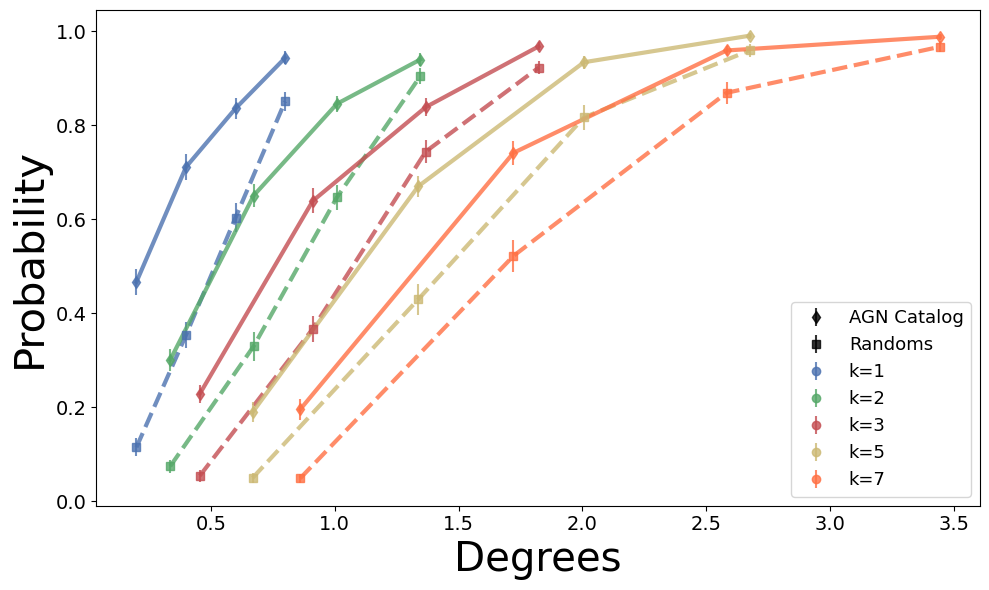

In [39]:
#Calculate relevant values
chi_squared = kNN_chi_squared(outputhigh,outputlow,covhigh,covlow,concatenate=True)
chi_strnew = 'reduced chi_squared: '+ str(round(chi_squared,5)) + '/'+ str(len(angles)*len(kneighbors)) + ' = ' + str(round(round(chi_squared,5)/(len(angles)*len(kneighbors)),5))

# Set up the main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the main plot
ax.set_ylabel('Probability', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=14)

# ax.set_title('CDF of Angular Separation: High vs. Low mass AGN', fontsize=14)


# ax.set_title('CDF of Angular Separation: High vs. Low ' + 'Black Hole Mass' + ' AGN: ' , fontsize=14)
# ax.set_title('CDF of Angular Separation: Full catalog vs. randoms: ' + str(round(zmin,4)) + "-" + str(round(zmax,4)) , fontsize=14)

ax.set_xlabel('Degrees', fontsize=29)

colors = [
    "#4C72B0",  # Blue
    "#55A868",  # Green
    "#C44E52",  # Red
    "#8172B2",  # Muted Purple
    "#CCB974",  # Muted Yellow
    "#64B5CD",  # Light Blue
    "#FF7043",  # Orange-Red
    "#8C8C8C",  # Gray
]

legend_created = False;

for ind,neighbor in zip(np.arange(len(kneighbors)),kneighbors) :  
    if(neighbor != 4 and neighbor != 6):
        anglemax = angles[-1] * 180/(math.pi) * np.sqrt(neighbor)
        anglemin = angles[0] * 180/(math.pi) * np.sqrt(neighbor)
        scaled_angles = angles * 180 / (math.pi) * math.pow(neighbor,3/4)

        # Calculate relevant values for each neighbor
        differr = kNN_diff_error(outputhigh[ind], outputlow[ind], errhigh[ind], errlow[ind], single_neighbor=True)
        # Plot for each neighbor

        ax.errorbar(scaled_angles, outputhigh[ind], yerr=errhigh[ind], fmt='d', alpha=0.8, color=colors[neighbor-1])
        ax.errorbar(scaled_angles, outputlow[ind], yerr=errlow[ind], fmt='s', alpha=0.8, color=colors[neighbor-1])

        ax.plot(scaled_angles, outputhigh[ind], '-', lw = 3, alpha=0.8, color=colors[neighbor-1])
        ax.plot(scaled_angles, outputlow[ind], '--', lw=3, alpha=0.8, color=colors[neighbor-1])
        if not legend_created:
            ax.errorbar([], [], yerr=[], fmt='d', alpha=0.8, color='black', label='AGN Catalog')
            ax.errorbar([], [], yerr=[], fmt='s', alpha=0.8, color='black', label='Randoms')
            for i in kneighbors-1:
                if(i != 3 and i != 5):
                    ax.errorbar([], [], yerr=[], fmt='o', alpha=0.8, color=colors[i], label=f'k={i+1}')
            legend_created = True
        
ax.legend(loc='lower right', fontsize=13)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# plt.text(anglemax-(.3*math.sqrt(kneighbors[-1])), 0.1, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
# plt.text(2.4,.2, str(round(zmin,2)) + " < z < " + str(round(zmax,2)), fontsize = 20, bbox = dict(facecolor = 'white', alpha = 0.5))

plt.tight_layout()

# plt.savefig('AGN vs Randoms CDF- k=1,2,3,5,7 neighbors.pdf', format='pdf')

plt.show()



# print(f"The scale is {scale_kpc_per_degree.value:.2f} kpc/degree at z={z}.")

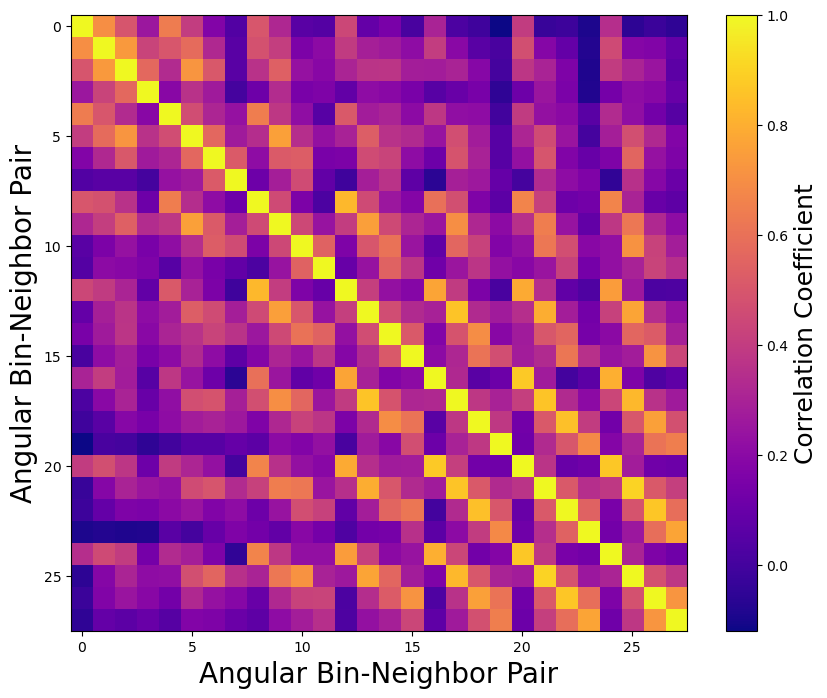

In [40]:
combined_cov = covhigh+covlow
corr_matrix = np.zeros((len(covhigh),len(covhigh)))
for i in range(len(covhigh)):
    for j in range(len(covhigh)):
        corr_matrix[i,j] = (combined_cov[i,j])/(math.sqrt(combined_cov[i,i]*combined_cov[j,j]))
        
# Creating the plot
plt.figure(figsize=(10, 8))  # Set the figure size as desired
plt.imshow(corr_matrix, cmap='plasma')  # Using 'coolwarm' as it's better for diverging data
cbar = plt.colorbar()
cbar.set_label('Correlation Coefficient', fontsize=18)

# Adding titles and labels
plt.xlabel('Angular Bin-Neighbor Pair', fontsize = 20)
plt.ylabel('Angular Bin-Neighbor Pair', fontsize = 20)

# plt.savefig('AGN vs Randoms Normalized Covariance Matrix.pdf', format='pdf')


# Show the plot
plt.show()


# MBH Redshift Distribution Plot

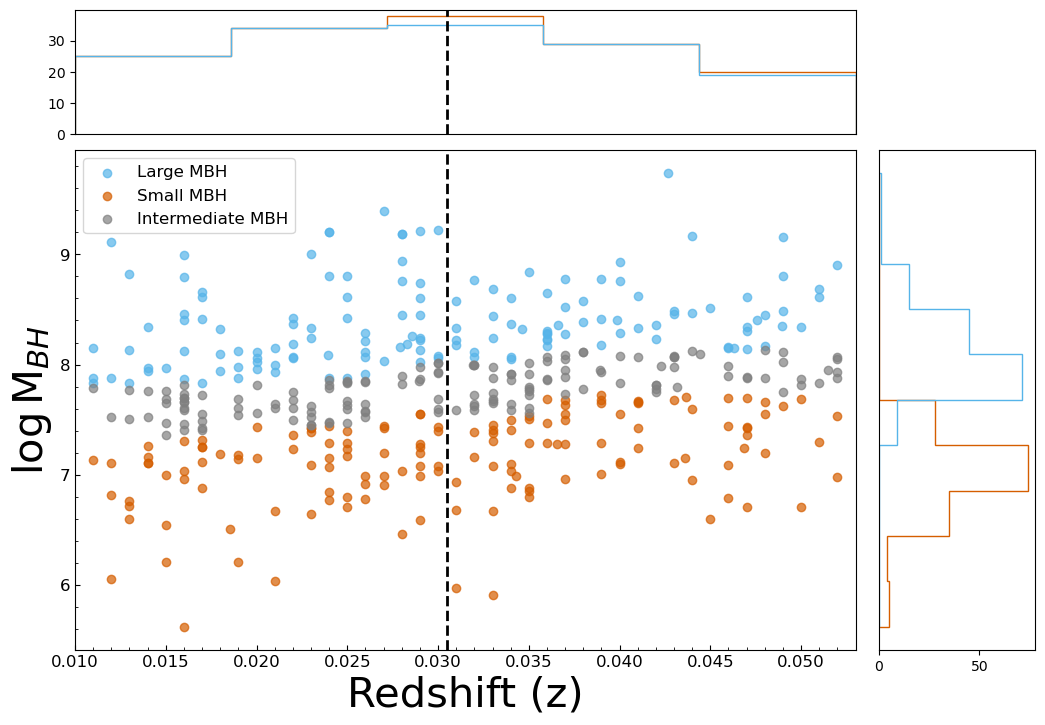

In [15]:
nonzero=(agnmass["Mbh"]>0)
agnmass=agnmass[nonzero]

zbins=np.linspace(0.01,.053,num=6)
percentile=33

stmin=np.min(agnmass['Mbh'][agnmass['Mbh']>0])
stmax=np.max(agnmass['Mbh'][agnmass['Mbh']>0])
increm=(stmax-stmin)/9
massbins=np.arange(stmin,stmax+increm,increm)

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='Mbh',percentile=percentile)

## Black hole mass distribution w.r.t. redshift ##

# Set up figure layout with an additional column for the right-side histogram
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 4], hspace=0.05, wspace=0.05)

# Assign subplots
ax0 = plt.subplot(gs[0, 0])  # For the top histogram (redshift distribution)
ax1 = plt.subplot(gs[1, 0])  # For the main scatter plot
ax2 = plt.subplot(gs[1, 1])  # For the right-side histogram (black hole mass distribution)

# Top histogram (redshift distribution)
ax0.hist(l['z'], bins=zbins, histtype='step', color='#D55E00', label='Low Bin', density=False)
ax0.hist(up['z'], bins=zbins, histtype='step', color='#56B4E9', label='High Bin', density=False)
ax0.set_xlim(0.01,0.053)
ax0.set_xticks([])
ax0.axvline(x=0.0305, color='k', linestyle='--', linewidth=2)  # Black dashed line at z = 0.0305
# ax0.axvline(x=0.053, color='k', linestyle='--', linewidth=2)  # Black dashed line at z = 0.053
ax0.set_xticks([])  # Hide x-axis labels

# Main scatter plot (black hole mass vs. redshift)
ax1.scatter(up['z'], up['Mbh'], color='#56B4E9', label='Large MBH', alpha=0.7)
ax1.scatter(l['z'], l['Mbh'], color='#D55E00', label='Small MBH', alpha=0.7)
ax1.scatter(m['z'], m['Mbh'], color='#808080', label='Intermediate MBH', alpha=0.7)
ax1.set_xlabel('Redshift (z)',fontsize = "30")
ax1.set_ylabel(r'$\log$M$_{BH}$', fontsize = "30")
ax1.set_xscale("linear")
ax1.axvline(x=0.0305, color='k', linestyle='--', linewidth=2)  # Black dashed line at z = 0.0305
# ax1.axvline(x=0.053, color='k', linestyle='--', linewidth=2)  # Black dashed line at z = 0.053
ax1.set_xlim(0.01,0.053)
ax1.legend(loc='upper left', fontsize=12)

# Right-side histogram (black hole mass distribution) with horizontal orientation
ax2.hist(l['Mbh'], bins=massbins, orientation='horizontal', histtype='step', color='#D55E00', label='Low Bin', density=False)
ax2.hist(up['Mbh'], bins=massbins, orientation='horizontal', histtype='step', color='#56B4E9', label='High Bin', density=False)
ax2.set_yticks([])  # Also hide y-axis labels for the right-side histogram

# Here, we disable the grid by not calling ax1.grid()
# Adjustments to the scatter plot ticks for clarity
ax1.minorticks_on()
ax1.tick_params(which='minor', direction='in', labelsize=12)
ax1.tick_params(which='major', direction='in', labelsize=12)



fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)



plt.savefig('black hole mass distribution.pdf', format='pdf')

plt.show()


# Luminosity Redshift Distribution Plot

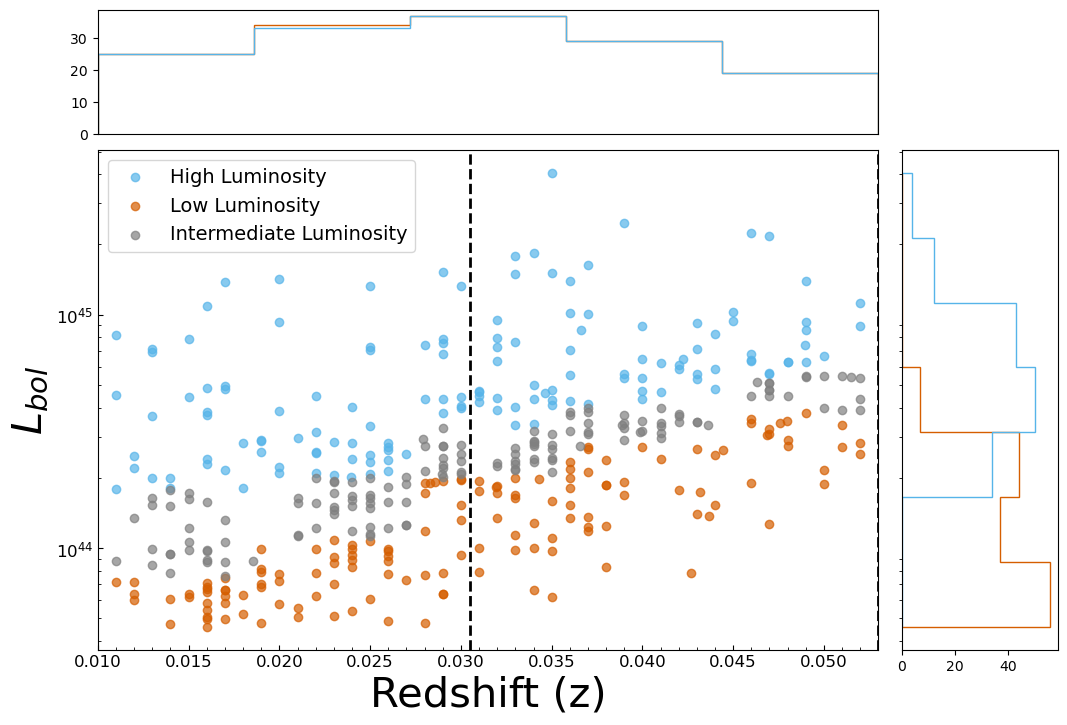

In [16]:
nonzero=(agnmass["Mbh"]>0)
agnmass=agnmass[nonzero]

zbins=np.linspace(0.01,.053,num=6)
percentile=33

nonzero=(agnmass["L_bol"]>0)
agnmass=agnmass[nonzero]
nonzero=(agnmass["L_bol"]<(5*(10**(45))))
agnmass=agnmass[nonzero]
stmin=np.min(agnmass['L_bol'])
stmax=np.max(agnmass['L_bol'])
increm=(stmax-stmin)/9
lumbins=np.arange(stmin,stmax+increm,increm)
lumbins=np.logspace(np.log10(stmin), np.log10(stmax), num=8)

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='L_bol',percentile=percentile)

## Luminosity distribution w.r.t. redshift ##

# Set up figure layout with an additional column for the right-side histogram
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[5, 1], height_ratios=[1, 4], hspace=0.05, wspace=0.05)

# Assign subplots
ax0 = plt.subplot(gs[0, 0])  # For the top histogram (redshift distribution)
ax1 = plt.subplot(gs[1, 0])  # For the main scatter plot
ax2 = plt.subplot(gs[1, 1])  # For the right-side histogram (black hole mass distribution)

# Top histogram (redshift distribution)
ax0.hist(l['z'], bins=zbins, histtype='step', color='#D55E00', label='Low Bin', density=False)
ax0.hist(up['z'], bins=zbins, histtype='step', color='#56B4E9', label='High Bin', density=False)
ax0.set_xlim(0.01,0.053)
ax0.set_xticks([])  # Hide x-axis labels

# Main scatter plot (black hole mass vs. redshift)
ax1.scatter(up['z'], up['L_bol'], color='#56B4E9', label='High Luminosity', alpha=0.7)
ax1.scatter(l['z'], l['L_bol'], color='#D55E00', label='Low Luminosity', alpha=0.7)
ax1.scatter(m['z'], m['L_bol'], color='#808080', label='Intermediate Luminosity', alpha=0.7)
ax1.axvline(x=0.0305, color='k', linestyle='--', linewidth=2)  # Black dashed line at z = 0.0305
ax1.axvline(x=0.053, color='k', linestyle='--', linewidth=2)  # Black dashed line at z = 0.053
ax1.set_xlabel('Redshift (z)',fontsize = "30")
ax1.set_ylabel(r'$L_{bol}$', fontsize = "30")
ax1.set_xscale("linear")
ax1.set_yscale('log')
ax1.set_xlim(0.01,0.053)
ax1.legend(loc = 'upper left', fontsize=14)

# Right-side histogram (black hole mass distribution) with horizontal orientation
ax2.hist(l['L_bol'], bins=lumbins, orientation='horizontal', histtype='step', color='#D55E00', label='Low Bin', density=False)
ax2.hist(up['L_bol'], bins=lumbins, orientation='horizontal', histtype='step', color='#56B4E9', label='High Bin', density=False)
ax2.set_yscale('log')
ax2.set_yticks([])  # Also hide y-axis labels for the right-side histogram

# Here, we disable the grid by not calling ax1.grid()
# Adjustments to the scatter plot ticks for clarity
ax1.minorticks_on()
ax1.tick_params(which='minor', direction='in', labelsize=12)
ax1.tick_params(which='major', direction='in', labelsize=12)

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


# plt.savefig('luminosity distribution.pdf', format='pdf')

plt.show()

# Setup for Plots that use Low Red Shift Range

In [17]:
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN

div = 33
redshift0 = 0
redshift33 = np.percentile(agn['z'], div)
redshift66 = np.percentile(agn['z'], div*2)
redshift99 = np.percentile(agn['z'], 100)

nonzero = ( (agn['z'] > redshift0) & (agn['z'] <= redshift33) )
lowredshift = agn[nonzero]

nonzero = ( (agn['z'] > redshift33) & (agn['z'] <= redshift66) )
midredshift = agn[nonzero]

nonzero = ( (agn['z'] > redshift66) & (agn['z'] <= redshift99) )
highredshift = agn[nonzero]

zmin = (lowredshift['z'].min())
zmax = (lowredshift['z'].max())

gal=gal[(gal['z']>zmin)&(gal['z']<=zmax)]

# Large MBH vs Small MBH: Low Red Shift Range Plot

In [21]:
# For limiting redshift samplings
agnmass = lowredshift

# agnmass = agn
# gal =np.array(t)
# gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN


nonzero=(agnmass["Mbh"]>0)
agnmass=agnmass[nonzero]

zbins=np.linspace(0.01,.053,num=6)
percentile=33

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='Mbh',percentile=percentile)

kneighbors = np.array([1,2,3,4,5,6,7])

degree_min = 0
degree_max = 1

anglestemp = np.linspace(degree_min*np.pi/180.0, degree_max*np.pi/180.0, 6)


angles = anglestemp[:-1]
angles = angles[1:]

linear_angle_adjust = 0

outputhightemp, errhightemp, covhigh = k.angular_kNN_wrapper(anglestemp, up, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)
outputlowtemp, errlowtemp, covlow =  k.angular_kNN_wrapper(anglestemp, l, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)

outputhigh = np.delete(outputhightemp, -1, axis=1)
outputhigh = np.delete(outputhigh, 0, axis=1)
errhigh = np.delete(errhightemp, -1, axis=1)
errhigh = np.delete(errhigh, 0, axis=1)


outputlow = np.delete(outputlowtemp, -1, axis=1)
outputlow = np.delete(outputlow, 0, axis=1)
errlow = np.delete(errlowtemp, -1, axis=1)
errlow = np.delete(errlow, 0, axis=1)

Ngal 19395 Nrand 74 7
build tree 0.011292219161987305
query 0.0022635459899902344
  kdtree tot 0.013592720031738281
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007114410400390625
Ngal 19395 Nrand 74 7
build tree 0.010632753372192383
query 0.0020563602447509766
  kdtree tot 0.012719392776489258
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006237030029296875
Ngal 19395 Nrand 74 7
build tree 0.01011800765991211
query 0.0020325183868408203
  kdtree tot 0.01217961311340332
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005919933319091797
Ngal 19395 Nrand 74 7
build tree 0.010115861892700195
query 0.0020182132720947266
  kdtree tot 0.012162923812866211
(74, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005917549133300781
Ngal 19395 Nrand 74 7
build tree 0.01001739501953125
query 0.0020205974578

query 0.0018699169158935547
  kdtree tot 0.011291265487670898
(73, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0009162425994873047
Ngal 19344 Nrand 73 7
build tree 0.009567975997924805
query 0.001796722412109375
  kdtree tot 0.011392354965209961
(73, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005483627319335938
Ngal 19344 Nrand 73 7
build tree 0.009366273880004883
query 0.0017871856689453125
  kdtree tot 0.011180400848388672
(73, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.00054168701171875
Ngal 19344 Nrand 73 7
build tree 0.009613275527954102
query 0.0017960071563720703
  kdtree tot 0.011435747146606445
(73, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005841255187988281
Ngal 19344 Nrand 73 7
build tree 0.009298324584960938
query 0.001786947250366211
  kdtree tot 0.011112213134765625
(73, 7) [0.   

query 0.0019178390502929688
  kdtree tot 0.01132965087890625
(73, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0008509159088134766
Ngal 19168 Nrand 73 7
build tree 0.009426593780517578
query 0.0017998218536376953
  kdtree tot 0.011262893676757812
(73, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005459785461425781
Ngal 19168 Nrand 73 7
build tree 0.009219169616699219
query 0.0017991065979003906
  kdtree tot 0.011045694351196289
(73, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005619525909423828
Ngal 19168 Nrand 73 7
build tree 0.009224891662597656
query 0.0017991065979003906
  kdtree tot 0.011051416397094727
(73, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005521774291992188
Ngal 19168 Nrand 73 7
build tree 0.009182214736938477
query 0.0018100738525390625
  kdtree tot 0.011018991470336914
(73, 7) [0.

query 0.0019981861114501953
  kdtree tot 0.011546850204467773
(73, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0008761882781982422
Ngal 19257 Nrand 73 7
build tree 0.009527921676635742
query 0.001903533935546875
  kdtree tot 0.011458873748779297
(73, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005469322204589844
Ngal 19257 Nrand 73 7
build tree 0.009282350540161133
query 0.0018873214721679688
  kdtree tot 0.011196613311767578
(73, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005483627319335938
Ngal 19257 Nrand 73 7
build tree 0.00922703742980957
query 0.0018873214721679688
  kdtree tot 0.011141061782836914
(73, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005528926849365234
Ngal 19257 Nrand 73 7
build tree 0.009214639663696289
query 0.0018973350524902344
  kdtree tot 0.011138916015625
(73, 7) [0.    

query 0.001969575881958008
  kdtree tot 0.011623144149780273
(73, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0008459091186523438
Ngal 19322 Nrand 73 7
build tree 0.009576082229614258
query 0.0018305778503417969
  kdtree tot 0.011433839797973633
(73, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005533695220947266
Ngal 19322 Nrand 73 7
build tree 0.009418487548828125
query 0.0018873214721679688
  kdtree tot 0.011333465576171875
(73, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005505084991455078
29 / 49
Ngal 19313 Nrand 74 7
build tree 0.009361505508422852
query 0.0018215179443359375
  kdtree tot 0.011211872100830078
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005638599395751953
Ngal 19313 Nrand 74 7
build tree 0.009369611740112305
query 0.0018358230590820312
  kdtree tot 0.011233329772949219
(74

query 0.0018761157989501953
  kdtree tot 0.011338233947753906
(73, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0008270740509033203
36 / 49
Ngal 19259 Nrand 74 7
build tree 0.009357213973999023
query 0.001844644546508789
  kdtree tot 0.011229515075683594
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.000553131103515625
Ngal 19259 Nrand 74 7
build tree 0.009248495101928711
query 0.0018389225006103516
  kdtree tot 0.01111459732055664
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005469322204589844
Ngal 19259 Nrand 74 7
build tree 0.00935673713684082
query 0.0018343925476074219
  kdtree tot 0.011217832565307617
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005433559417724609
Ngal 19259 Nrand 74 7
build tree 0.009313344955444336
query 0.0018458366394042969
  kdtree tot 0.011187076568603516
(74, 7

query 0.0019083023071289062
  kdtree tot 0.011622905731201172
(73, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007634162902832031
Ngal 19293 Nrand 73 7
build tree 0.009495019912719727
query 0.0018124580383300781
  kdtree tot 0.011347293853759766
(73, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005514621734619141
Ngal 19293 Nrand 73 7
build tree 0.009418487548828125
query 0.0018339157104492188
  kdtree tot 0.01127934455871582
(73, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005445480346679688
Ngal 19293 Nrand 73 7
build tree 0.009395599365234375
query 0.0019381046295166016
  kdtree tot 0.01136159896850586
(73, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005426406860351562
Ngal 19293 Nrand 73 7
build tree 0.009593009948730469
query 0.0018265247344970703
  kdtree tot 0.011446952819824219
(73, 7) [0. 

build tree 0.010579109191894531
query 0.0025224685668945312
  kdtree tot 0.013156890869140625
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006353855133056641
Ngal 19395 Nrand 74 7
build tree 0.010243415832519531
query 0.0018930435180664062
  kdtree tot 0.012164115905761719
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005519390106201172
Ngal 19395 Nrand 74 7
build tree 0.010181903839111328
query 0.0018868446350097656
  kdtree tot 0.012096643447875977
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.000545501708984375
Ngal 19395 Nrand 74 7
build tree 0.010014533996582031
query 0.0018804073333740234
  kdtree tot 0.011924028396606445
(74, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005483627319335938
Ngal 19395 Nrand 74 7
build tree 0.010021448135375977
query 0.0018851757049560547
  kdtree tot 

query 0.0018284320831298828
  kdtree tot 0.011210441589355469
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0007739067077636719
Ngal 19344 Nrand 74 7
build tree 0.009547948837280273
query 0.0017254352569580078
  kdtree tot 0.011299848556518555
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005514621734619141
Ngal 19344 Nrand 74 7
build tree 0.009537458419799805
query 0.0017237663269042969
  kdtree tot 0.011288166046142578
(74, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005443096160888672
Ngal 19344 Nrand 74 7
build tree 0.009418249130249023
query 0.0017292499542236328
  kdtree tot 0.011175155639648438
(74, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005507469177246094
Ngal 19344 Nrand 74 7
build tree 0.009518146514892578
query 0.0017304420471191406
  kdtree tot 0.011275768280029297
(74, 7) [0

build tree 0.009833812713623047
query 0.0020990371704101562
  kdtree tot 0.012041091918945312
(73, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0006189346313476562
Ngal 19168 Nrand 73 7
build tree 0.00926518440246582
query 0.0017359256744384766
  kdtree tot 0.01102757453918457
(73, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.00055694580078125
Ngal 19168 Nrand 73 7
build tree 0.009234905242919922
query 0.001733541488647461
  kdtree tot 0.010994911193847656
(73, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005464553833007812
Ngal 19168 Nrand 73 7
build tree 0.009207487106323242
query 0.001775979995727539
  kdtree tot 0.011016845703125
(73, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005438327789306641
15 / 49
Ngal 19262 Nrand 74 7
build tree 0.009679079055786133
query 0.0019757747650146484
  kdtree tot 

query 0.001920938491821289
  kdtree tot 0.011281013488769531
(74, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0008969306945800781
Ngal 19257 Nrand 74 7
build tree 0.009603023529052734
query 0.001790761947631836
  kdtree tot 0.011420726776123047
(74, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005638599395751953
Ngal 19257 Nrand 74 7
build tree 0.0093841552734375
query 0.0018033981323242188
  kdtree tot 0.011214733123779297
(74, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005526542663574219
22 / 49
Ngal 19345 Nrand 74 7
build tree 0.00950765609741211
query 0.0018191337585449219
  kdtree tot 0.011369466781616211
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005502700805664062
Ngal 19345 Nrand 74 7
build tree 0.009618520736694336
query 0.0018284320831298828
  kdtree tot 0.011474609375
(74, 7) [0.  

query 0.0018432140350341797
  kdtree tot 0.011345624923706055
(74, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.000850677490234375
29 / 49
Ngal 19313 Nrand 74 7
build tree 0.009354114532470703
query 0.0017817020416259766
  kdtree tot 0.01116323471069336
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005748271942138672
Ngal 19313 Nrand 74 7
build tree 0.009401559829711914
query 0.001787424087524414
  kdtree tot 0.011215686798095703
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005612373352050781
Ngal 19313 Nrand 74 7
build tree 0.009360551834106445
query 0.0017800331115722656
  kdtree tot 0.01116800308227539
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005519390106201172
Ngal 19313 Nrand 74 7
build tree 0.009465456008911133
query 0.0018649101257324219
  kdtree tot 0.011357545852661133
(74, 7

build tree 0.0102386474609375
query 0.0019397735595703125
  kdtree tot 0.012240171432495117
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006265640258789062
Ngal 19259 Nrand 74 7
build tree 0.009428739547729492
query 0.0018489360809326172
  kdtree tot 0.011304140090942383
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005693435668945312
Ngal 19259 Nrand 74 7
build tree 0.009275197982788086
query 0.0018661022186279297
  kdtree tot 0.011168718338012695
(74, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005500316619873047
Ngal 19259 Nrand 74 7
build tree 0.009701728820800781
query 0.001905202865600586
  kdtree tot 0.011633872985839844
(74, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005621910095214844
Ngal 19259 Nrand 74 7
build tree 0.009283065795898438
query 0.0018167495727539062
  kdtree tot 0.

query 0.0018568038940429688
  kdtree tot 0.011309385299682617
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0010523796081542969
Ngal 19293 Nrand 74 7
build tree 0.009469270706176758
query 0.0018105506896972656
  kdtree tot 0.011307954788208008
(74, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005528926849365234
Ngal 19293 Nrand 74 7
build tree 0.009390115737915039
query 0.0017819404602050781
  kdtree tot 0.011210918426513672
(74, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005497932434082031
Ngal 19293 Nrand 74 7
build tree 0.009263277053833008
query 0.0018091201782226562
  kdtree tot 0.011099815368652344
(74, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005495548248291016
Ngal 19293 Nrand 74 7
build tree 0.009279727935791016
query 0.0017893314361572266
  kdtree tot 0.01109933853149414
(74, 7) [0.

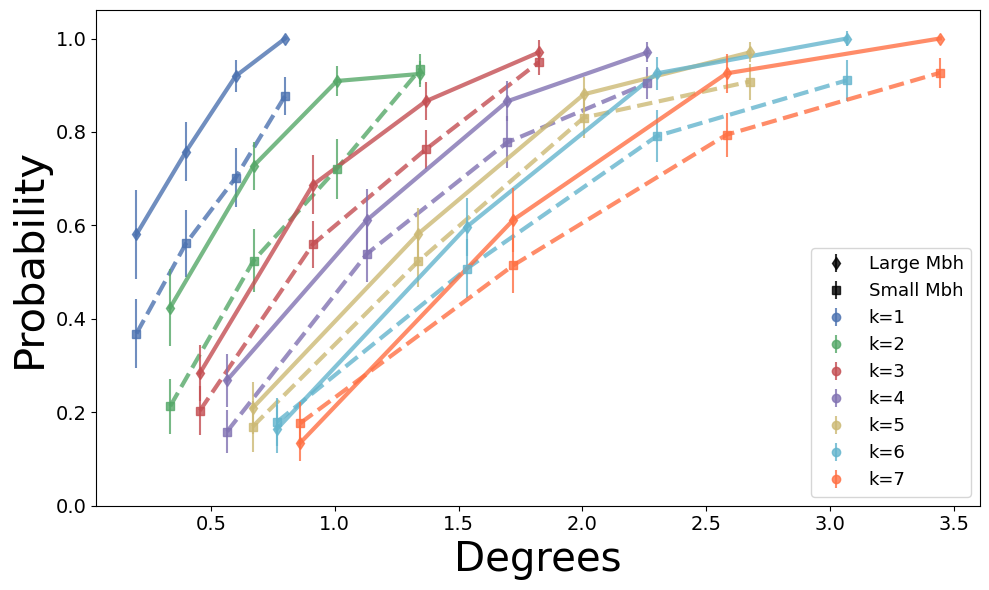

In [23]:
#Calculate relevant values
chi_squared = kNN_chi_squared(outputhigh,outputlow,covhigh,covlow,concatenate=True)
chi_strnew = 'reduced chi_squared: '+ str(round(chi_squared,5)) + '/'+ str(len(angles)*len(kneighbors)) + ' = ' + str(round(round(chi_squared,5)/(len(angles)*len(kneighbors)),5))

# Set up the main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the main plot
ax.set_ylabel('Probability', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=14)

# ax.set_title('CDF of Angular Separation: High vs. Low mass AGN', fontsize=14)


# ax.set_title('CDF of Angular Separation: High vs. Low ' + 'Black Hole Mass' + ' AGN: ' , fontsize=14)
# ax.set_title('CDF of Angular Separation: Full catalog vs. randoms: ' + str(round(zmin,4)) + "-" + str(round(zmax,4)) , fontsize=14)

ax.set_xlabel('Degrees', fontsize=29)

colors = [
    "#4C72B0",  # Blue
    "#55A868",  # Green
    "#C44E52",  # Red
    "#8172B2",  # Muted Purple
    "#CCB974",  # Muted Yellow
    "#64B5CD",  # Light Blue
    "#FF7043",  # Orange-Red
    "#8C8C8C",  # Gray
]

legend_created = False;

for ind,neighbor in zip(np.arange(len(kneighbors)),kneighbors) :  
    anglemax = angles[-1] * 180/(math.pi) * np.sqrt(neighbor)
    anglemin = angles[0] * 180/(math.pi) * np.sqrt(neighbor)
    scaled_angles = angles * 180 / (math.pi) * math.pow(neighbor,3/4)
    
    # Calculate relevant values for each neighbor
    differr = kNN_diff_error(outputhigh[ind], outputlow[ind], errhigh[ind], errlow[ind], single_neighbor=True)
    # Plot for each neighbor
        
    ax.errorbar(scaled_angles, outputhigh[ind], yerr=errhigh[ind], fmt='d', alpha=0.8, color=colors[neighbor-1])
    ax.errorbar(scaled_angles, outputlow[ind], yerr=errlow[ind], fmt='s', alpha=0.8, color=colors[neighbor-1])
    
    ax.plot(scaled_angles, outputhigh[ind], '-', lw = 3, alpha=0.8, color=colors[neighbor-1])
    ax.plot(scaled_angles, outputlow[ind], '--', lw=3, alpha=0.8, color=colors[neighbor-1])
    if not legend_created:
        ax.errorbar([], [], yerr=[], fmt='d', alpha=0.8, color='black', label='Large Mbh')
        ax.errorbar([], [], yerr=[], fmt='s', alpha=0.8, color='black', label='Small Mbh')
        for i in kneighbors-1:
            ax.errorbar([], [], yerr=[], fmt='o', alpha=0.8, color=colors[i], label=f'k={i+1}')
        legend_created = True
        
ax.legend(loc='lower right', fontsize=13)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# plt.text(anglemax-(.3*math.sqrt(kneighbors[-1])), 0.1, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
# plt.text(2.4,.2, str(round(zmin,2)) + " < z < " + str(round(zmax,2)), fontsize = 20, bbox = dict(facecolor = 'white', alpha = 0.5))

plt.tight_layout()

# plt.savefig('black hole mass CDF-low redshift.pdf', format='pdf')

plt.show()



# print(f"The scale is {scale_kpc_per_degree.value:.2f} kpc/degree at z={z}.")

# High Luminosity vs Low Luminosity: Low Red Shift Range Plot

In [26]:
# For limiting redshift samplings
agnmass = lowredshift

zbins=np.linspace(0.01,.053,num=6)
percentile=33

nonzero=(agnmass["L_bol"]>0)
agnmass=agnmass[nonzero]
nonzero=(agnmass["L_bol"]<(5*(10**(45))))
agnmass=agnmass[nonzero]
stmin=np.min(agnmass['L_bol'])
stmax=np.max(agnmass['L_bol'])
increm=(stmax-stmin)/9
lumbins=np.arange(stmin,stmax+increm,increm)
lumbins=np.logspace(np.log10(stmin), np.log10(stmax), num=8)

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='L_bol', percentile=percentile)

kneighbors = np.array([1,2,3,4,5,6,7])

degree_min = 0
degree_max = 1

anglestemp = np.linspace(degree_min*np.pi/180.0, degree_max*np.pi/180.0, 6)

angles = anglestemp[:-1]
angles = angles[1:]

linear_angle_adjust = 0


outputhightemp, errhightemp, covhigh = k.angular_kNN_wrapper(anglestemp, up, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)
outputlowtemp, errlowtemp, covlow =  k.angular_kNN_wrapper(anglestemp, l, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)

outputhigh = np.delete(outputhightemp, -1, axis=1)
outputhigh = np.delete(outputhigh, 0, axis=1)
errhigh = np.delete(errhightemp, -1, axis=1)
errhigh = np.delete(errhigh, 0, axis=1)


outputlow = np.delete(outputlowtemp, -1, axis=1)
outputlow = np.delete(outputlow, 0, axis=1)
errlow = np.delete(errlowtemp, -1, axis=1)
errlow = np.delete(errlow, 0, axis=1)

Ngal 19395 Nrand 79 7
build tree 0.010721206665039062
query 0.0022602081298828125
  kdtree tot 0.01301717758178711
(79, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007429122924804688
Ngal 19395 Nrand 79 7
build tree 0.010061264038085938
query 0.002254009246826172
  kdtree tot 0.012344837188720703
(79, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006198883056640625
Ngal 19395 Nrand 79 7
build tree 0.010095596313476562
query 0.0022051334381103516
  kdtree tot 0.012330770492553711
(79, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005965232849121094
Ngal 19395 Nrand 79 7
build tree 0.01007986068725586
query 0.002197265625
  kdtree tot 0.012304544448852539
(79, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005843639373779297
Ngal 19395 Nrand 79 7
build tree 0.010015249252319336
query 0.0022192001342773438


query 0.0019073486328125
  kdtree tot 0.011357307434082031
(77, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007567405700683594
7 / 49
Ngal 19344 Nrand 78 7
build tree 0.00951838493347168
query 0.0019524097442626953
  kdtree tot 0.011498451232910156
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005738735198974609
Ngal 19344 Nrand 78 7
build tree 0.009359359741210938
query 0.001894235610961914
  kdtree tot 0.011279582977294922
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005605220794677734
Ngal 19344 Nrand 78 7
build tree 0.009340047836303711
query 0.0018951892852783203
  kdtree tot 0.011262178421020508
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005526542663574219
Ngal 19344 Nrand 78 7
build tree 0.00939631462097168
query 0.0019447803497314453
  kdtree tot 0.011367559432983398
(78, 7) [

build tree 0.00991678237915039
query 0.005369424819946289
  kdtree tot 0.015669822692871094
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005731582641601562
Ngal 19168 Nrand 78 7
build tree 0.009993314743041992
query 0.0021963119506835938
  kdtree tot 0.012229204177856445
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005476474761962891
Ngal 19168 Nrand 78 7
build tree 0.009973526000976562
query 0.002195596694946289
  kdtree tot 0.012197256088256836
(78, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005581378936767578
Ngal 19168 Nrand 78 7
build tree 0.009998559951782227
query 0.002244234085083008
  kdtree tot 0.012271642684936523
(78, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005655288696289062
Ngal 19168 Nrand 78 7
build tree 0.009963035583496094
query 0.0022199153900146484
  kdtree tot 0.0

build tree 0.009931802749633789
query 0.00225830078125
  kdtree tot 0.012293338775634766
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005826950073242188
Ngal 19257 Nrand 78 7
build tree 0.00942087173461914
query 0.001981496810913086
  kdtree tot 0.0114288330078125
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005433559417724609
Ngal 19257 Nrand 78 7
build tree 0.009289264678955078
query 0.0019876956939697266
  kdtree tot 0.011304140090942383
(78, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005385875701904297
Ngal 19257 Nrand 78 7
build tree 0.009287357330322266
query 0.0019872188568115234
  kdtree tot 0.011301755905151367
(78, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005414485931396484
Ngal 19257 Nrand 78 7
build tree 0.009243488311767578
query 0.001981496810913086
  kdtree tot 0.0112509

build tree 0.009976387023925781
query 0.0022890567779541016
  kdtree tot 0.012368202209472656
(79, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005927085876464844
Ngal 19322 Nrand 79 7
build tree 0.009412527084350586
query 0.002039670944213867
  kdtree tot 0.011479854583740234
(79, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005457401275634766
Ngal 19322 Nrand 79 7
build tree 0.009456396102905273
query 0.0020329952239990234
  kdtree tot 0.011515617370605469
(79, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005571842193603516
Ngal 19322 Nrand 79 7
build tree 0.009426355361938477
query 0.002042055130004883
  kdtree tot 0.011495351791381836
(79, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005507469177246094
Ngal 19322 Nrand 79 7
build tree 0.009459495544433594
query 0.002050638198852539
  kdtree tot 0.

query 0.0022428035736083984
  kdtree tot 0.011636972427368164
(77, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0012178421020507812
Ngal 19254 Nrand 77 7
build tree 0.009685039520263672
query 0.0020837783813476562
  kdtree tot 0.011795759201049805
(77, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.000553131103515625
Ngal 19254 Nrand 77 7
build tree 0.009353399276733398
query 0.0020856857299804688
  kdtree tot 0.011465311050415039
(77, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005397796630859375
Ngal 19254 Nrand 77 7
build tree 0.009327888488769531
query 0.0020830631256103516
  kdtree tot 0.011437416076660156
(77, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005376338958740234
Ngal 19254 Nrand 77 7
build tree 0.009282350540161133
query 0.0020859241485595703
  kdtree tot 0.011394500732421875
(77, 7) [0.

Ngal 19327 Nrand 78 7
build tree 0.010367393493652344
query 0.0022575855255126953
  kdtree tot 0.012655258178710938
(78, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005996227264404297
Ngal 19327 Nrand 78 7
build tree 0.009845256805419922
query 0.0021216869354248047
  kdtree tot 0.011993885040283203
(78, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005731582641601562
Ngal 19327 Nrand 78 7
build tree 0.00989675521850586
query 0.002163410186767578
  kdtree tot 0.012089967727661133
(78, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005943775177001953
Ngal 19327 Nrand 78 7
build tree 0.009790182113647461
query 0.002129793167114258
  kdtree tot 0.011947393417358398
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005590915679931641
43 / 49
Ngal 19293 Nrand 79 7
build tree 0.009772777557373047
query 0.00212

build tree 0.010117769241333008
query 0.002773284912109375
  kdtree tot 0.012947797775268555
(79, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005974769592285156
Ngal 19351 Nrand 79 7
build tree 0.009373188018798828
query 0.0019567012786865234
  kdtree tot 0.011357545852661133
(79, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005695819854736328
Ngal 19351 Nrand 79 7
build tree 0.00935053825378418
query 0.0019648075103759766
  kdtree tot 0.011342525482177734
(79, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005629062652587891
Ngal 19395 Nrand 79 7
build tree 0.00995635986328125
query 0.002150297164916992
  kdtree tot 0.012134075164794922
(79, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005509853363037109
Ngal 19395 Nrand 79 7
build tree 0.010023117065429688
query 0.002151012420654297
  kdtree tot 0.01

query 0.0019445419311523438
  kdtree tot 0.011164188385009766
(77, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0007698535919189453
Ngal 18778 Nrand 77 7
build tree 0.009295463562011719
query 0.0019102096557617188
  kdtree tot 0.011233091354370117
(77, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005505084991455078
Ngal 18778 Nrand 77 7
build tree 0.0090179443359375
query 0.0018444061279296875
  kdtree tot 0.010889768600463867
(77, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005629062652587891
Ngal 18778 Nrand 77 7
build tree 0.009093523025512695
query 0.0018448829650878906
  kdtree tot 0.01096653938293457
(77, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005424022674560547
Ngal 18778 Nrand 77 7
build tree 0.009233474731445312
query 0.001832723617553711
  kdtree tot 0.011092901229858398
(77, 7) [0.   

query 0.0021238327026367188
  kdtree tot 0.011492252349853516
(79, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0007617473602294922
Ngal 19105 Nrand 79 7
build tree 0.00948476791381836
query 0.0021011829376220703
  kdtree tot 0.011612176895141602
(79, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005571842193603516
Ngal 19105 Nrand 79 7
build tree 0.009253263473510742
query 0.0020215511322021484
  kdtree tot 0.011301755905151367
(79, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005521774291992188
Ngal 19105 Nrand 79 7
build tree 0.009219169616699219
query 0.0020148754119873047
  kdtree tot 0.011260986328125
(79, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005636215209960938
14 / 49
Ngal 19168 Nrand 78 7
build tree 0.00923776626586914
query 0.0019791126251220703
  kdtree tot 0.011243820190429688
(78, 7)

build tree 0.009711503982543945
query 0.002164602279663086
  kdtree tot 0.011926889419555664
(78, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005934238433837891
Ngal 18862 Nrand 78 7
build tree 0.00915217399597168
query 0.001992940902709961
  kdtree tot 0.011171340942382812
(78, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005574226379394531
Ngal 18862 Nrand 78 7
build tree 0.009123563766479492
query 0.0019922256469726562
  kdtree tot 0.011142492294311523
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005424022674560547
21 / 49
Ngal 19257 Nrand 79 7
build tree 0.009348392486572266
query 0.0020685195922851562
  kdtree tot 0.011444091796875
(79, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005655288696289062
Ngal 19257 Nrand 79 7
build tree 0.009374380111694336
query 0.0020728111267089844
  kdtree t

query 0.0021092891693115234
  kdtree tot 0.011518478393554688
(78, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0008041858673095703
Ngal 19018 Nrand 78 7
build tree 0.009592056274414062
query 0.0020058155059814453
  kdtree tot 0.011624336242675781
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005505084991455078
28 / 49
Ngal 19322 Nrand 78 7
build tree 0.009426355361938477
query 0.0020058155059814453
  kdtree tot 0.011460065841674805
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005612373352050781
Ngal 19322 Nrand 78 7
build tree 0.009386777877807617
query 0.002000093460083008
  kdtree tot 0.011414289474487305
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.000545501708984375
Ngal 19322 Nrand 78 7
build tree 0.009398698806762695
query 0.002034902572631836
  kdtree tot 0.011459589004516602
(78, 

query 0.0020911693572998047
  kdtree tot 0.011434316635131836
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.00074005126953125
35 / 49
Ngal 19254 Nrand 79 7
build tree 0.009394407272338867
query 0.002076864242553711
  kdtree tot 0.011501073837280273
(79, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005521774291992188
Ngal 19254 Nrand 79 7
build tree 0.009228706359863281
query 0.002056598663330078
  kdtree tot 0.011312007904052734
(79, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005471706390380859
Ngal 19254 Nrand 79 7
build tree 0.009329795837402344
query 0.002053976058959961
  kdtree tot 0.011411666870117188
(79, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005450248718261719
Ngal 19254 Nrand 79 7
build tree 0.009500980377197266
query 0.0020439624786376953
  kdtree tot 0.01157236099243164
(79, 7) 

query 0.0022420883178710938
  kdtree tot 0.012094259262084961
(79, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0008304119110107422
Ngal 19327 Nrand 79 7
build tree 0.009775876998901367
query 0.002157926559448242
  kdtree tot 0.011961936950683594
(79, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005898475646972656
Ngal 19327 Nrand 79 7
build tree 0.009720325469970703
query 0.0021653175354003906
  kdtree tot 0.011913776397705078
(79, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005662441253662109
Ngal 19327 Nrand 79 7
build tree 0.009711980819702148
query 0.0021941661834716797
  kdtree tot 0.011934041976928711
(79, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005688667297363281
Ngal 19327 Nrand 79 7
build tree 0.009743690490722656
query 0.0021486282348632812
  kdtree tot 0.011919260025024414
(79, 7) [0.

build tree 0.00992441177368164
query 0.0023622512817382812
  kdtree tot 0.012385368347167969
(79, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006005764007568359
Ngal 19351 Nrand 79 7
build tree 0.00941157341003418
query 0.0020258426666259766
  kdtree tot 0.011464118957519531
(79, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005528926849365234
Ngal 19351 Nrand 79 7
build tree 0.009423494338989258
query 0.0020287036895751953
  kdtree tot 0.011478900909423828
(79, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005483627319335938
Ngal 19351 Nrand 79 7
build tree 0.009676456451416016
query 0.0020296573638916016
  kdtree tot 0.011733293533325195
(79, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005462169647216797
Ngal 19351 Nrand 79 7
build tree 0.009534120559692383
query 0.0021250247955322266
  kdtree tot 0

In [ ]:
#Calculate relevant values
chi_squared = kNN_chi_squared(outputhigh,outputlow,covhigh,covlow,concatenate=True)
chi_strnew = 'reduced chi_squared: '+ str(round(chi_squared,5)) + '/'+ str(len(angles)*len(kneighbors)) + ' = ' + str(round(round(chi_squared,5)/(len(angles)*len(kneighbors)),5))

# Set up the main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the main plot
ax.set_ylabel('Probability', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=14)

# ax.set_title('CDF of Angular Separation: High vs. Low mass AGN', fontsize=14)


# ax.set_title('CDF of Angular Separation: High vs. Low ' + 'Black Hole Mass' + ' AGN: ' , fontsize=14)
# ax.set_title('CDF of Angular Separation: Full catalog vs. randoms: ' + str(round(zmin,4)) + "-" + str(round(zmax,4)) , fontsize=14)

ax.set_xlabel('Degrees', fontsize=29)

colors = [
    "#4C72B0",  # Blue
    "#55A868",  # Green
    "#C44E52",  # Red
    "#8172B2",  # Muted Purple
    "#CCB974",  # Muted Yellow
    "#64B5CD",  # Light Blue
    "#FF7043",  # Orange-Red
    "#8C8C8C",  # Gray
]

legend_created = False;

for ind,neighbor in zip(np.arange(len(kneighbors)),kneighbors) :  
    anglemax = angles[-1] * 180/(math.pi) * np.sqrt(neighbor)
    anglemin = angles[0] * 180/(math.pi) * np.sqrt(neighbor)
    scaled_angles = angles * 180 / (math.pi) * math.pow(neighbor,3/4)
    
    # Calculate relevant values for each neighbor
    differr = kNN_diff_error(outputhigh[ind], outputlow[ind], errhigh[ind], errlow[ind], single_neighbor=True)
    # Plot for each neighbor
        
    ax.errorbar(scaled_angles, outputhigh[ind], yerr=errhigh[ind], fmt='d', alpha=0.8, color=colors[neighbor-1])
    ax.errorbar(scaled_angles, outputlow[ind], yerr=errlow[ind], fmt='s', alpha=0.8, color=colors[neighbor-1])
    
    ax.plot(scaled_angles, outputhigh[ind], '-', lw = 3, alpha=0.8, color=colors[neighbor-1])
    ax.plot(scaled_angles, outputlow[ind], '--', lw=3, alpha=0.8, color=colors[neighbor-1])
    if not legend_created:
        ax.errorbar([], [], yerr=[], fmt='d', alpha=0.8, color='black', label='High Luminosity')
        ax.errorbar([], [], yerr=[], fmt='s', alpha=0.8, color='black', label='Low Luminosity')
        for i in kneighbors-1:
            ax.errorbar([], [], yerr=[], fmt='o', alpha=0.8, color=colors[i], label=f'k={i+1}')
        legend_created = True
        
ax.legend(loc='lower right', fontsize=13)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# plt.text(anglemax-(.3*math.sqrt(kneighbors[-1])), 0.1, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
# plt.text(2.4,.2, str(round(zmin,2)) + " < z < " + str(round(zmax,2)), fontsize = 20, bbox = dict(facecolor = 'white', alpha = 0.5))

plt.tight_layout()

# plt.savefig('luminosity CDF-low redshift.pdf', format='pdf')

plt.show()



# print(f"The scale is {scale_kpc_per_degree.value:.2f} kpc/degree at z={z}.")

# Setup for Plots that Use high redshift Range

In [27]:
agn = agnt[ (agnt['L210']>42.5) & (agnt['z']>.01)&(agnt['z']<=.1) ]
gal =np.array(t)
gal=gal[(gal['z']>.01)&(gal['z']<=.1)] #Limit redshifts to same range as AGN

div = 33
redshift0 = 0
redshift33 = np.percentile(agn['z'], div)
redshift66 = np.percentile(agn['z'], div*2)
redshift99 = np.percentile(agn['z'], 100)

nonzero = ( (agn['z'] > redshift0) & (agn['z'] <= redshift33) )
lowredshift = agn[nonzero]

nonzero = ( (agn['z'] > redshift33) & (agn['z'] <= redshift66) )
midredshift = agn[nonzero]

nonzero = ( (agn['z'] > redshift66) & (agn['z'] <= redshift99) )
highredshift = agn[nonzero]

zmin = (midredshift['z'].min())
zmax = (midredshift['z'].max())

gal=gal[(gal['z']>zmin)&(gal['z']<=zmax)]

# Large MBH vs Small MBH: High Red Shift Range Plot

In [32]:
# For limiting redshift samplings
agnmass = midredshift

nonzero=(agnmass["Mbh"]>0)
agnmass=agnmass[nonzero]

zbins=np.linspace(0.01,.053,num=6)
percentile=33

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='Mbh',percentile=percentile)

kneighbors = np.array([1,2,3,4,5,6,7])

degree_min = 0
degree_max = 1

anglestemp = np.linspace(degree_min*np.pi/180.0, degree_max*np.pi/180.0, 6)


angles = anglestemp[:-1]
angles = angles[1:]

linear_angle_adjust = 0

outputhightemp, errhightemp, covhigh = k.angular_kNN_wrapper(anglestemp, up, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)
outputlowtemp, errlowtemp, covlow =  k.angular_kNN_wrapper(anglestemp, l, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)

outputhigh = np.delete(outputhightemp, -1, axis=1)
outputhigh = np.delete(outputhigh, 0, axis=1)
errhigh = np.delete(errhightemp, -1, axis=1)
errhigh = np.delete(errhigh, 0, axis=1)


outputlow = np.delete(outputlowtemp, -1, axis=1)
outputlow = np.delete(outputlow, 0, axis=1)
errlow = np.delete(errlowtemp, -1, axis=1)
errlow = np.delete(errlow, 0, axis=1)

Ngal 14073 Nrand 69 7
build tree 0.008287668228149414
query 0.001676797866821289
  kdtree tot 0.009999275207519531
(69, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007181167602539062
Ngal 14073 Nrand 69 7
build tree 0.007872819900512695
query 0.0016498565673828125
  kdtree tot 0.009552717208862305
(69, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005984306335449219
Ngal 14073 Nrand 69 7
build tree 0.007882833480834961
query 0.001644134521484375
  kdtree tot 0.009558439254760742
(69, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006029605865478516
Ngal 14073 Nrand 69 7
build tree 0.00783538818359375
query 0.0016291141510009766
  kdtree tot 0.00949406623840332
(69, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005955696105957031
Ngal 14073 Nrand 69 7
build tree 0.007874488830566406
query 0.00162196159362

query 0.0015146732330322266
  kdtree tot 0.008490800857543945
(68, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0008172988891601562
Ngal 13364 Nrand 68 7
build tree 0.0069522857666015625
query 0.0014836788177490234
  kdtree tot 0.008462905883789062
(68, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005621910095214844
6 / 49
Ngal 13838 Nrand 67 7
build tree 0.00718379020690918
query 0.001554727554321289
  kdtree tot 0.008771896362304688
(67, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006129741668701172
Ngal 13838 Nrand 67 7
build tree 0.007081031799316406
query 0.0015530586242675781
  kdtree tot 0.008660554885864258
(67, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005419254302978516
Ngal 13838 Nrand 67 7
build tree 0.007122516632080078
query 0.0015304088592529297
  kdtree tot 0.008679628372192383
(67,

query 0.0015301704406738281
  kdtree tot 0.00853586196899414
(65, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007631778717041016
Ngal 13900 Nrand 65 7
build tree 0.0070133209228515625
query 0.0014677047729492188
  kdtree tot 0.008507966995239258
(65, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005412101745605469
Ngal 13900 Nrand 65 7
build tree 0.00690770149230957
query 0.0014183521270751953
  kdtree tot 0.008353233337402344
(65, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005376338958740234
Ngal 13900 Nrand 65 7
build tree 0.007166624069213867
query 0.0014841556549072266
  kdtree tot 0.00867772102355957
(65, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005457401275634766
Ngal 13900 Nrand 65 7
build tree 0.007149696350097656
query 0.001451253890991211
  kdtree tot 0.008626937866210938
(65, 7) [0.  

query 0.0016336441040039062
  kdtree tot 0.008478641510009766
(68, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0008120536804199219
Ngal 13722 Nrand 68 7
build tree 0.006935834884643555
query 0.0015597343444824219
  kdtree tot 0.008522510528564453
(68, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005509853363037109
Ngal 13722 Nrand 68 7
build tree 0.00677490234375
query 0.001519918441772461
  kdtree tot 0.008321285247802734
(68, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005505084991455078
Ngal 13722 Nrand 68 7
build tree 0.006768465042114258
query 0.0015158653259277344
  kdtree tot 0.008310079574584961
(68, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005545616149902344
Ngal 13722 Nrand 68 7
build tree 0.006743907928466797
query 0.0015149116516113281
  kdtree tot 0.008284807205200195
(68, 7) [0.    

query 0.0015995502471923828
  kdtree tot 0.008514642715454102
(68, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0008425712585449219
Ngal 13462 Nrand 68 7
build tree 0.006917715072631836
query 0.0015096664428710938
  kdtree tot 0.008453607559204102
(68, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005390644073486328
Ngal 13462 Nrand 68 7
build tree 0.006986856460571289
query 0.0016064643859863281
  kdtree tot 0.008620262145996094
(68, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005619525909423828
25 / 49
Ngal 13612 Nrand 64 7
build tree 0.007048368453979492
query 0.0014274120330810547
  kdtree tot 0.008502721786499023
(64, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005552768707275391
Ngal 13612 Nrand 64 7
build tree 0.0066640377044677734
query 0.0014061927795410156
  kdtree tot 0.008097648620605469
(

query 0.0016918182373046875
  kdtree tot 0.008597373962402344
(68, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0008654594421386719
31 / 49
Ngal 13652 Nrand 69 7
build tree 0.006875276565551758
query 0.0014917850494384766
  kdtree tot 0.008393287658691406
(69, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005562305450439453
Ngal 13652 Nrand 69 7
build tree 0.006777763366699219
query 0.0014882087707519531
  kdtree tot 0.008292675018310547
(69, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005514621734619141
Ngal 13652 Nrand 69 7
build tree 0.006731986999511719
query 0.0014891624450683594
  kdtree tot 0.008248090744018555
(69, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005476474761962891
Ngal 13652 Nrand 69 7
build tree 0.006734132766723633
query 0.0014903545379638672
  kdtree tot 0.008252143859863281
(6

build tree 0.007666826248168945
query 0.002387523651123047
  kdtree tot 0.010166168212890625
(68, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006456375122070312
Ngal 13870 Nrand 68 7
build tree 0.007135868072509766
query 0.0015785694122314453
  kdtree tot 0.008741378784179688
(68, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005452632904052734
Ngal 13870 Nrand 68 7
build tree 0.0071222782135009766
query 0.001596212387084961
  kdtree tot 0.00874471664428711
(68, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005629062652587891
Ngal 13870 Nrand 68 7
build tree 0.007130146026611328
query 0.001558065414428711
  kdtree tot 0.008714914321899414
(68, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005486011505126953
Ngal 13870 Nrand 68 7
build tree 0.007169008255004883
query 0.0016052722930908203
  kdtree tot 0.

query 0.0016396045684814453
  kdtree tot 0.008604288101196289
(69, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0008168220520019531
Ngal 13963 Nrand 69 7
build tree 0.007190227508544922
query 0.001466512680053711
  kdtree tot 0.00868368148803711
(69, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005590915679931641
Ngal 13963 Nrand 69 7
build tree 0.0068895816802978516
query 0.0015163421630859375
  kdtree tot 0.008435964584350586
(69, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005407333374023438
Ngal 13963 Nrand 69 7
build tree 0.00714874267578125
query 0.0015628337860107422
  kdtree tot 0.008738040924072266
(69, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005359649658203125
Ngal 13963 Nrand 69 7
build tree 0.006939411163330078
query 0.0014712810516357422
  kdtree tot 0.008436203002929688
(69, 7) [0. 

query 0.0015573501586914062
  kdtree tot 0.00858163833618164
(69, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0008146762847900391
Ngal 14052 Nrand 69 7
build tree 0.007119655609130859
query 0.0014126300811767578
  kdtree tot 0.008559703826904297
(69, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005490779876708984
Ngal 14052 Nrand 69 7
build tree 0.006833553314208984
query 0.0014109611511230469
  kdtree tot 0.008270740509033203
(69, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005497932434082031
Ngal 14052 Nrand 69 7
build tree 0.006850481033325195
query 0.001409769058227539
  kdtree tot 0.008287906646728516
(69, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005519390106201172
Ngal 14073 Nrand 71 7
build tree 0.007292270660400391
query 0.0016710758209228516
  kdtree tot 0.00899052619934082
(71, 7) [0.  

query 0.0015311241149902344
  kdtree tot 0.008178949356079102
(69, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0008385181427001953
Ngal 13364 Nrand 69 7
build tree 0.006896495819091797
query 0.0014200210571289062
  kdtree tot 0.008342981338500977
(69, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005424022674560547
Ngal 13364 Nrand 69 7
build tree 0.006629228591918945
query 0.0014162063598632812
  kdtree tot 0.008071422576904297
(69, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005424022674560547
Ngal 13364 Nrand 69 7
build tree 0.006746053695678711
query 0.0014750957489013672
  kdtree tot 0.008247613906860352
(69, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005447864532470703
Ngal 13364 Nrand 69 7
build tree 0.006781578063964844
query 0.0014164447784423828
  kdtree tot 0.008223772048950195
(69, 7) [0

query 0.0017001628875732422
  kdtree tot 0.008574485778808594
(67, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0007824897766113281
Ngal 13611 Nrand 67 7
build tree 0.006826639175415039
query 0.0015225410461425781
  kdtree tot 0.008376359939575195
(67, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005464553833007812
Ngal 13611 Nrand 67 7
build tree 0.006688833236694336
query 0.0015251636505126953
  kdtree tot 0.008240222930908203
(67, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005481243133544922
Ngal 13611 Nrand 67 7
build tree 0.006682634353637695
query 0.001567840576171875
  kdtree tot 0.008276939392089844
(67, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005459785461425781
12 / 49
Ngal 13900 Nrand 71 7
build tree 0.007008075714111328
query 0.001645803451538086
  kdtree tot 0.008681535720825195
(71,

  cdf 0.0015511512756347656
Ngal 13766 Nrand 69 7
build tree 0.007732391357421875
query 0.001537322998046875
  kdtree tot 0.009296894073486328
(69, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005457401275634766
Ngal 13766 Nrand 69 7
build tree 0.006773233413696289
query 0.0015537738800048828
  kdtree tot 0.00835418701171875
(69, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005483627319335938
18 / 49
Ngal 13722 Nrand 67 7
build tree 0.0068438053131103516
query 0.0015299320220947266
  kdtree tot 0.008400917053222656
(67, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005435943603515625
Ngal 13722 Nrand 67 7
build tree 0.006715536117553711
query 0.001531839370727539
  kdtree tot 0.008274555206298828
(67, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005373954772949219
Ngal 13722 Nrand 67 7
build tree 0.006

query 0.0019550323486328125
  kdtree tot 0.009006738662719727
(70, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0010328292846679688
Ngal 13847 Nrand 70 7
build tree 0.0074443817138671875
query 0.0015785694122314453
  kdtree tot 0.009048938751220703
(70, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005443096160888672
Ngal 13847 Nrand 70 7
build tree 0.006834745407104492
query 0.0015461444854736328
  kdtree tot 0.008407831192016602
(70, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.000537872314453125
24 / 49
Ngal 13462 Nrand 68 7
build tree 0.006814002990722656
query 0.0013775825500488281
  kdtree tot 0.008218526840209961
(68, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005564689636230469
Ngal 13462 Nrand 68 7
build tree 0.006723880767822266
query 0.0013782978057861328
  kdtree tot 0.008129358291625977
(6

query 0.001749277114868164
  kdtree tot 0.008757591247558594
(71, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0008537769317626953
30 / 49
Ngal 13896 Nrand 70 7
build tree 0.006895303726196289
query 0.0014562606811523438
  kdtree tot 0.008379459381103516
(70, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005459785461425781
Ngal 13896 Nrand 70 7
build tree 0.006829023361206055
query 0.0014522075653076172
  kdtree tot 0.00830841064453125
(70, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005481243133544922
Ngal 13896 Nrand 70 7
build tree 0.0071163177490234375
query 0.0015032291412353516
  kdtree tot 0.008646249771118164
(70, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005371570587158203
Ngal 13896 Nrand 70 7
build tree 0.0067903995513916016
query 0.0014491081237792969
  kdtree tot 0.008270978927612305
(7

query 0.0017004013061523438
  kdtree tot 0.008588075637817383
(71, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0007505416870117188
Ngal 13966 Nrand 71 7
build tree 0.007033348083496094
query 0.0015532970428466797
  kdtree tot 0.008613348007202148
(71, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005490779876708984
Ngal 13966 Nrand 71 7
build tree 0.006860494613647461
query 0.0015439987182617188
  kdtree tot 0.008431196212768555
(71, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.00054168701171875
Ngal 13966 Nrand 71 7
build tree 0.006820201873779297
query 0.0015511512756347656
  kdtree tot 0.008398294448852539
(71, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005376338958740234
Ngal 13966 Nrand 71 7
build tree 0.006827116012573242
query 0.0015411376953125
  kdtree tot 0.008394718170166016
(71, 7) [0.    

query 0.0016601085662841797
  kdtree tot 0.008609294891357422
(71, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0008225440979003906
Ngal 13975 Nrand 71 7
build tree 0.007109642028808594
query 0.0015702247619628906
  kdtree tot 0.008707046508789062
(71, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005443096160888672
Ngal 13975 Nrand 71 7
build tree 0.006865978240966797
query 0.0015180110931396484
  kdtree tot 0.008410215377807617
(71, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005481243133544922
Ngal 13975 Nrand 71 7
build tree 0.006823301315307617
query 0.0015556812286376953
  kdtree tot 0.008405685424804688
(71, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005388259887695312
43 / 49
Ngal 13963 Nrand 71 7
build tree 0.00700688362121582
query 0.0015292167663574219
  kdtree tot 0.008563995361328125
(71

query 0.0016443729400634766
  kdtree tot 0.008565902709960938
(71, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0008232593536376953
Ngal 13949 Nrand 71 7
build tree 0.00710296630859375
query 0.00154876708984375
  kdtree tot 0.008678436279296875
(71, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005495548248291016
49 / 49
Ngal 14052 Nrand 70 7
build tree 0.006955146789550781
query 0.0015861988067626953
  kdtree tot 0.008569002151489258
(70, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005474090576171875
Ngal 14052 Nrand 70 7
build tree 0.0068705081939697266
query 0.0015435218811035156
  kdtree tot 0.008441448211669922
(70, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005452632904052734
Ngal 14052 Nrand 70 7
build tree 0.006920576095581055
query 0.001542806625366211
  kdtree tot 0.008490324020385742
(70, 

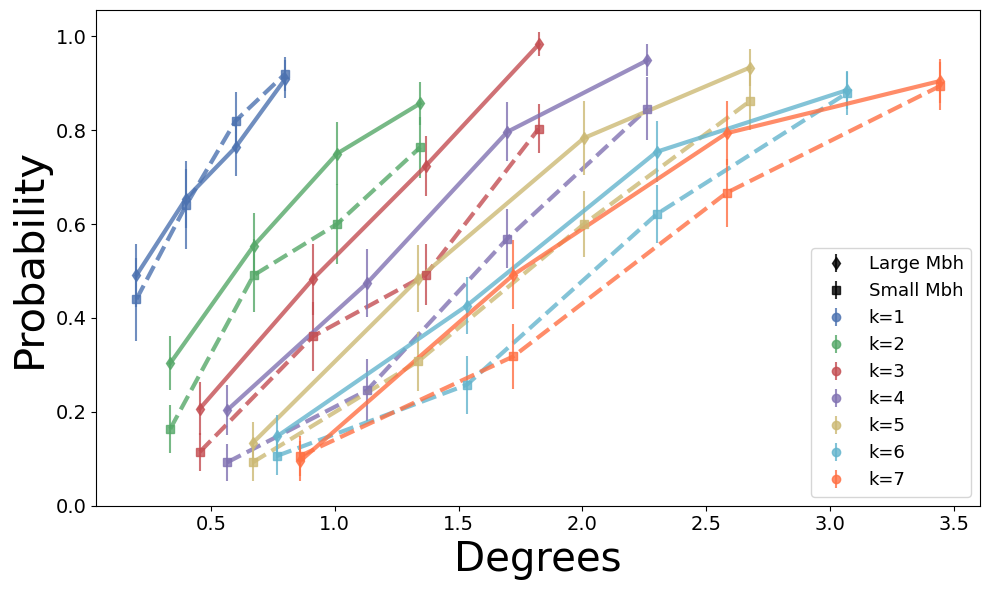

In [31]:
#Calculate relevant values
chi_squared = kNN_chi_squared(outputhigh,outputlow,covhigh,covlow,concatenate=True)
chi_strnew = 'reduced chi_squared: '+ str(round(chi_squared,5)) + '/'+ str(len(angles)*len(kneighbors)) + ' = ' + str(round(round(chi_squared,5)/(len(angles)*len(kneighbors)),5))

# Set up the main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the main plot
ax.set_ylabel('Probability', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=14)

# ax.set_title('CDF of Angular Separation: High vs. Low mass AGN', fontsize=14)


# ax.set_title('CDF of Angular Separation: High vs. Low ' + 'Black Hole Mass' + ' AGN: ' , fontsize=14)
# ax.set_title('CDF of Angular Separation: Full catalog vs. randoms: ' + str(round(zmin,4)) + "-" + str(round(zmax,4)) , fontsize=14)

ax.set_xlabel('Degrees', fontsize=29)

colors = [
    "#4C72B0",  # Blue
    "#55A868",  # Green
    "#C44E52",  # Red
    "#8172B2",  # Muted Purple
    "#CCB974",  # Muted Yellow
    "#64B5CD",  # Light Blue
    "#FF7043",  # Orange-Red
    "#8C8C8C",  # Gray
]

legend_created = False;

for ind,neighbor in zip(np.arange(len(kneighbors)),kneighbors) :  
    anglemax = angles[-1] * 180/(math.pi) * np.sqrt(neighbor)
    anglemin = angles[0] * 180/(math.pi) * np.sqrt(neighbor)
    scaled_angles = angles * 180 / (math.pi) * math.pow(neighbor,3/4)
    
    # Calculate relevant values for each neighbor
    differr = kNN_diff_error(outputhigh[ind], outputlow[ind], errhigh[ind], errlow[ind], single_neighbor=True)
    # Plot for each neighbor
        
    ax.errorbar(scaled_angles, outputhigh[ind], yerr=errhigh[ind], fmt='d', alpha=0.8, color=colors[neighbor-1])
    ax.errorbar(scaled_angles, outputlow[ind], yerr=errlow[ind], fmt='s', alpha=0.8, color=colors[neighbor-1])
    
    ax.plot(scaled_angles, outputhigh[ind], '-', lw = 3, alpha=0.8, color=colors[neighbor-1])
    ax.plot(scaled_angles, outputlow[ind], '--', lw=3, alpha=0.8, color=colors[neighbor-1])
    if not legend_created:
        ax.errorbar([], [], yerr=[], fmt='d', alpha=0.8, color='black', label='Large Mbh')
        ax.errorbar([], [], yerr=[], fmt='s', alpha=0.8, color='black', label='Small Mbh')
        for i in kneighbors-1:
            ax.errorbar([], [], yerr=[], fmt='o', alpha=0.8, color=colors[i], label=f'k={i+1}')
        legend_created = True
        
ax.legend(loc='lower right', fontsize=13)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# plt.text(anglemax-(.3*math.sqrt(kneighbors[-1])), 0.1, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
# plt.text(2.4,.2, str(round(zmin,2)) + " < z < " + str(round(zmax,2)), fontsize = 20, bbox = dict(facecolor = 'white', alpha = 0.5))

plt.tight_layout()

# plt.savefig('black hole mass CDF-high redshift.pdf', format='pdf')

plt.show()



# print(f"The scale is {scale_kpc_per_degree.value:.2f} kpc/degree at z={z}.")

# High Luminosity vs Low Luminosity: High Red Shift Range Plot

In [33]:
# For limiting redshift samplings
agnmass = midredshift

zbins=np.linspace(0.01,.053,num=6)
percentile=33

nonzero=(agnmass["L_bol"]>0)
agnmass=agnmass[nonzero]
nonzero=(agnmass["L_bol"]<(5*(10**(45))))
agnmass=agnmass[nonzero]
stmin=np.min(agnmass['L_bol'])
stmax=np.max(agnmass['L_bol'])
increm=(stmax-stmin)/9
lumbins=np.arange(stmin,stmax+increm,increm)
lumbins=np.logspace(np.log10(stmin), np.log10(stmax), num=8)

l, m, up = control_var(agn=agnmass,bins=zbins,control='z',var='L_bol', percentile=percentile)

kneighbors = np.array([1,2,3,4,5,6,7])

degree_min = 0
degree_max = 1

anglestemp = np.linspace(degree_min*np.pi/180.0, degree_max*np.pi/180.0, 6)

angles = anglestemp[:-1]
angles = angles[1:]

linear_angle_adjust = 0


outputhightemp, errhightemp, covhigh = k.angular_kNN_wrapper(anglestemp, up, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)
outputlowtemp, errlowtemp, covlow =  k.angular_kNN_wrapper(anglestemp, l, gal, kneighbors,
                                                             linear_angle_adjust, concatenate = True, m=7)

outputhigh = np.delete(outputhightemp, -1, axis=1)
outputhigh = np.delete(outputhigh, 0, axis=1)
errhigh = np.delete(errhightemp, -1, axis=1)
errhigh = np.delete(errhigh, 0, axis=1)


outputlow = np.delete(outputlowtemp, -1, axis=1)
outputlow = np.delete(outputlow, 0, axis=1)
errlow = np.delete(errlowtemp, -1, axis=1)
errlow = np.delete(errlow, 0, axis=1)

Ngal 14073 Nrand 78 7
build tree 0.008374214172363281
query 0.0021114349365234375
  kdtree tot 0.010534286499023438
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0007483959197998047
Ngal 14073 Nrand 78 7
build tree 0.0078582763671875
query 0.002020120620727539
  kdtree tot 0.009910106658935547
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0006203651428222656
Ngal 14073 Nrand 78 7
build tree 0.0077745914459228516
query 0.001970529556274414
  kdtree tot 0.009776592254638672
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0006093978881835938
Ngal 14073 Nrand 78 7
build tree 0.0077686309814453125
query 0.0019745826721191406
  kdtree tot 0.009773015975952148
(78, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005986690521240234
Ngal 14073 Nrand 78 7
build tree 0.007781267166137695
query 0.001929044723

query 0.0018463134765625
  kdtree tot 0.00864720344543457
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007259845733642578
6 / 49
Ngal 13838 Nrand 74 7
build tree 0.006968498229980469
query 0.0017085075378417969
  kdtree tot 0.00870513916015625
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005452632904052734
Ngal 13838 Nrand 74 7
build tree 0.0070955753326416016
query 0.0017647743225097656
  kdtree tot 0.00890040397644043
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005595684051513672
Ngal 13838 Nrand 74 7
build tree 0.006789445877075195
query 0.0017006397247314453
  kdtree tot 0.008517742156982422
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005364418029785156
Ngal 13838 Nrand 74 7
build tree 0.006845712661743164
query 0.0017070770263671875
  kdtree tot 0.008580207824707031
(74, 7) 

build tree 0.007386207580566406
query 0.0019237995147705078
  kdtree tot 0.00938105583190918
(77, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0006048679351806641
Ngal 13900 Nrand 77 7
build tree 0.006941556930541992
query 0.0017905235290527344
  kdtree tot 0.008779764175415039
(77, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.000560760498046875
Ngal 13900 Nrand 77 7
build tree 0.0067958831787109375
query 0.0017769336700439453
  kdtree tot 0.008599519729614258
(77, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005450248718261719
Ngal 13900 Nrand 77 7
build tree 0.006852626800537109
query 0.0017790794372558594
  kdtree tot 0.008658170700073242
(77, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005667209625244141
Ngal 13900 Nrand 77 7
build tree 0.0068569183349609375
query 0.0017726421356201172
  kdtree tot

query 0.001857757568359375
  kdtree tot 0.008849382400512695
(75, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0007796287536621094
Ngal 13766 Nrand 75 7
build tree 0.007239103317260742
query 0.0017502307891845703
  kdtree tot 0.009017229080200195
(75, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005576610565185547
18 / 49
Ngal 13722 Nrand 78 7
build tree 0.00685429573059082
query 0.0018513202667236328
  kdtree tot 0.008733034133911133
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005500316619873047
Ngal 13722 Nrand 78 7
build tree 0.006796121597290039
query 0.0018246173858642578
  kdtree tot 0.008648157119750977
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005536079406738281
Ngal 13722 Nrand 78 7
build tree 0.0068433284759521484
query 0.0018911361694335938
  kdtree tot 0.008762598037719727
(78

query 0.001821756362915039
  kdtree tot 0.008709192276000977
(78, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0007872581481933594
Ngal 13847 Nrand 78 7
build tree 0.006967306137084961
query 0.001810312271118164
  kdtree tot 0.008804559707641602
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.000553131103515625
24 / 49
Ngal 13462 Nrand 74 7
build tree 0.0067291259765625
query 0.0016460418701171875
  kdtree tot 0.008402347564697266
(74, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005602836608886719
Ngal 13462 Nrand 74 7
build tree 0.006715536117553711
query 0.0016453266143798828
  kdtree tot 0.00838780403137207
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005497932434082031
Ngal 13462 Nrand 74 7
build tree 0.0067059993743896484
query 0.0016453266143798828
  kdtree tot 0.008378982543945312
(74, 7)

query 0.0018007755279541016
  kdtree tot 0.008789777755737305
(78, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007998943328857422
30 / 49
Ngal 13896 Nrand 78 7
build tree 0.006918668746948242
query 0.0017476081848144531
  kdtree tot 0.008693695068359375
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005409717559814453
Ngal 13896 Nrand 78 7
build tree 0.006851911544799805
query 0.0017480850219726562
  kdtree tot 0.008626699447631836
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005524158477783203
Ngal 13896 Nrand 78 7
build tree 0.006817817687988281
query 0.0017375946044921875
  kdtree tot 0.008582353591918945
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005450248718261719
Ngal 13896 Nrand 78 7
build tree 0.00679469108581543
query 0.0017559528350830078
  kdtree tot 0.008577823638916016
(78

Ngal 13966 Nrand 77 7
build tree 0.008095741271972656
query 0.0017824172973632812
  kdtree tot 0.009905338287353516
(77, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005714893341064453
Ngal 13966 Nrand 77 7
build tree 0.006894588470458984
query 0.001783132553100586
  kdtree tot 0.008717536926269531
(77, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005412101745605469
Ngal 13966 Nrand 77 7
build tree 0.006944179534912109
query 0.0017821788787841797
  kdtree tot 0.008753538131713867
(77, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005488395690917969
Ngal 13966 Nrand 77 7
build tree 0.007129669189453125
query 0.001783609390258789
  kdtree tot 0.008939266204833984
(77, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005414485931396484
Ngal 13966 Nrand 77 7
build tree 0.0069501399993896484
query 0.00178694725

query 0.0018534660339355469
  kdtree tot 0.008687973022460938
(77, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007753372192382812
42 / 49
Ngal 13975 Nrand 78 7
build tree 0.006922006607055664
query 0.0017638206481933594
  kdtree tot 0.0087127685546875
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005598068237304688
Ngal 13975 Nrand 78 7
build tree 0.006812334060668945
query 0.0017642974853515625
  kdtree tot 0.008603572845458984
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005431175231933594
Ngal 13975 Nrand 78 7
build tree 0.006816864013671875
query 0.0017664432525634766
  kdtree tot 0.008610725402832031
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.000553131103515625
Ngal 13975 Nrand 78 7
build tree 0.006810903549194336
query 0.0018076896667480469
  kdtree tot 0.008645057678222656
(78, 

query 0.0018951892852783203
  kdtree tot 0.009077787399291992
(75, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0007472038269042969
48 / 49
Ngal 13949 Nrand 77 7
build tree 0.007242679595947266
query 0.0018966197967529297
  kdtree tot 0.009166717529296875
(77, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005779266357421875
Ngal 13949 Nrand 77 7
build tree 0.00723576545715332
query 0.001882314682006836
  kdtree tot 0.009144306182861328
(77, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005481243133544922
Ngal 13949 Nrand 77 7
build tree 0.007168769836425781
query 0.0018863677978515625
  kdtree tot 0.009081602096557617
(77, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005631446838378906
Ngal 13949 Nrand 77 7
build tree 0.0071430206298828125
query 0.0018930435180664062
  kdtree tot 0.009063720703125
(77, 7

  cdf 0.0015077590942382812
Ngal 13694 Nrand 77 7
build tree 0.0073320865631103516
query 0.0017223358154296875
  kdtree tot 0.009080648422241211
(77, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005447864532470703
Ngal 13694 Nrand 77 7
build tree 0.006678104400634766
query 0.0016336441040039062
  kdtree tot 0.00833749771118164
(77, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005438327789306641
Ngal 13694 Nrand 77 7
build tree 0.006659030914306641
query 0.0016434192657470703
  kdtree tot 0.008330106735229492
(77, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005424022674560547
Ngal 13694 Nrand 77 7
build tree 0.0066797733306884766
query 0.0016427040100097656
  kdtree tot 0.00834965705871582
(77, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005500316619873047
4 / 49
Ngal 13493 Nrand 77 7
build tree 0.00

build tree 0.0072863101959228516
query 0.0018086433410644531
  kdtree tot 0.009148836135864258
(75, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005996227264404297
Ngal 13572 Nrand 75 7
build tree 0.007129192352294922
query 0.0015778541564941406
  kdtree tot 0.008745431900024414
(75, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005624294281005859
Ngal 13572 Nrand 75 7
build tree 0.0067310333251953125
query 0.0016074180603027344
  kdtree tot 0.00836491584777832
(75, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005474090576171875
10 / 49
Ngal 13352 Nrand 76 7
build tree 0.0067250728607177734
query 0.0016181468963623047
  kdtree tot 0.008369684219360352
(76, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.00054931640625
Ngal 13352 Nrand 76 7
build tree 0.006669759750366211
query 0.0016105175018310547
  kdtre

query 0.0018162727355957031
  kdtree tot 0.008771896362304688
(77, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0007932186126708984
Ngal 13983 Nrand 77 7
build tree 0.007035255432128906
query 0.0017094612121582031
  kdtree tot 0.00877237319946289
(77, 7) [0.         0.         0.01502211 0.03004422 0.04506633 0.06008843
 0.07511054]
  cdf 0.0005390644073486328
16 / 49
Ngal 13898 Nrand 77 7
build tree 0.006911277770996094
query 0.0017173290252685547
  kdtree tot 0.008655309677124023
(77, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005600452423095703
Ngal 13898 Nrand 77 7
build tree 0.006827116012573242
query 0.0016605854034423828
  kdtree tot 0.008514642715454102
(77, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005528926849365234
Ngal 13898 Nrand 77 7
build tree 0.006901264190673828
query 0.0016727447509765625
  kdtree tot 0.008614063262939453
(77

  cdf 0.0012483596801757812
22 / 49
Ngal 14048 Nrand 78 7
build tree 0.0070743560791015625
query 0.001600027084350586
  kdtree tot 0.008701562881469727
(78, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0005676746368408203
Ngal 14048 Nrand 78 7
build tree 0.006849765777587891
query 0.0015826225280761719
  kdtree tot 0.008458614349365234
(78, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005474090576171875
Ngal 14048 Nrand 78 7
build tree 0.0069386959075927734
query 0.0016407966613769531
  kdtree tot 0.008606195449829102
(78, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005459785461425781
Ngal 14048 Nrand 78 7
build tree 0.007176637649536133
query 0.0016803741455078125
  kdtree tot 0.008882522583007812
(78, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005598068237304688
Ngal 14048 Nrand 78 7
build tree 0.

query 0.0017628669738769531
  kdtree tot 0.008742332458496094
(76, 7) [0.         0.         0.00349066 0.00698132 0.01047198 0.01396263
 0.01745329]
  cdf 0.0008525848388671875
Ngal 13948 Nrand 76 7
build tree 0.006995201110839844
query 0.001638174057006836
  kdtree tot 0.008659839630126953
(76, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0005421638488769531
Ngal 13948 Nrand 76 7
build tree 0.00682830810546875
query 0.001710653305053711
  kdtree tot 0.008565664291381836
(76, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005404949188232422
Ngal 13948 Nrand 76 7
build tree 0.00677490234375
query 0.0016584396362304688
  kdtree tot 0.00846099853515625
(76, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005469322204589844
Ngal 13948 Nrand 76 7
build tree 0.006991863250732422
query 0.001710653305053711
  kdtree tot 0.008729934692382812
(76, 7) [0.        

query 0.0016515254974365234
  kdtree tot 0.008587121963500977
(74, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0008628368377685547
Ngal 13712 Nrand 74 7
build tree 0.0072231292724609375
query 0.0015764236450195312
  kdtree tot 0.008826017379760742
(74, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005400180816650391
Ngal 13712 Nrand 74 7
build tree 0.0069065093994140625
query 0.0015425682067871094
  kdtree tot 0.008475303649902344
(74, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005469322204589844
Ngal 13712 Nrand 74 7
build tree 0.006855964660644531
query 0.0015411376953125
  kdtree tot 0.008423328399658203
(74, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005443096160888672
Ngal 13712 Nrand 74 7
build tree 0.006784915924072266
query 0.0015387535095214844
  kdtree tot 0.008349895477294922
(74, 7) [0.

query 0.0017197132110595703
  kdtree tot 0.008684396743774414
(76, 7) [0.         0.         0.00587056 0.01174113 0.01761169 0.02348226
 0.02935282]
  cdf 0.0007863044738769531
Ngal 13920 Nrand 76 7
build tree 0.007302522659301758
query 0.0016472339630126953
  kdtree tot 0.00897669792175293
(76, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005400180816650391
Ngal 13920 Nrand 76 7
build tree 0.006864309310913086
query 0.0016450881958007812
  kdtree tot 0.008536338806152344
(76, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005381107330322266
Ngal 13920 Nrand 76 7
build tree 0.006881237030029297
query 0.0016429424285888672
  kdtree tot 0.008550643920898438
(76, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005595684051513672
Ngal 13920 Nrand 76 7
build tree 0.006936311721801758
query 0.0016446113586425781
  kdtree tot 0.008607864379882812
(76, 7) [0.

build tree 0.007256746292114258
query 0.0018472671508789062
  kdtree tot 0.009157896041870117
(75, 7) [0.         0.         0.00795698 0.01591396 0.02387094 0.03182792
 0.0397849 ]
  cdf 0.0005624294281005859
Ngal 13679 Nrand 75 7
build tree 0.00691533088684082
query 0.001650094985961914
  kdtree tot 0.00859212875366211
(75, 7) [0.         0.         0.00987307 0.01974615 0.02961922 0.03949229
 0.04936537]
  cdf 0.0005419254302978516
Ngal 13679 Nrand 75 7
build tree 0.006720304489135742
query 0.0016634464263916016
  kdtree tot 0.008411169052124023
(75, 7) [0.         0.         0.01167172 0.02334344 0.03501516 0.04668688
 0.0583586 ]
  cdf 0.0005462169647216797
Ngal 13679 Nrand 75 7
build tree 0.006797075271606445
query 0.0016467571258544922
  kdtree tot 0.008470535278320312
(75, 7) [0.         0.         0.01338199 0.02676399 0.04014598 0.05352797
 0.06690997]
  cdf 0.0005476474761962891
Ngal 13679 Nrand 75 7
build tree 0.006865262985229492
query 0.0017080307006835938
  kdtree tot 0.

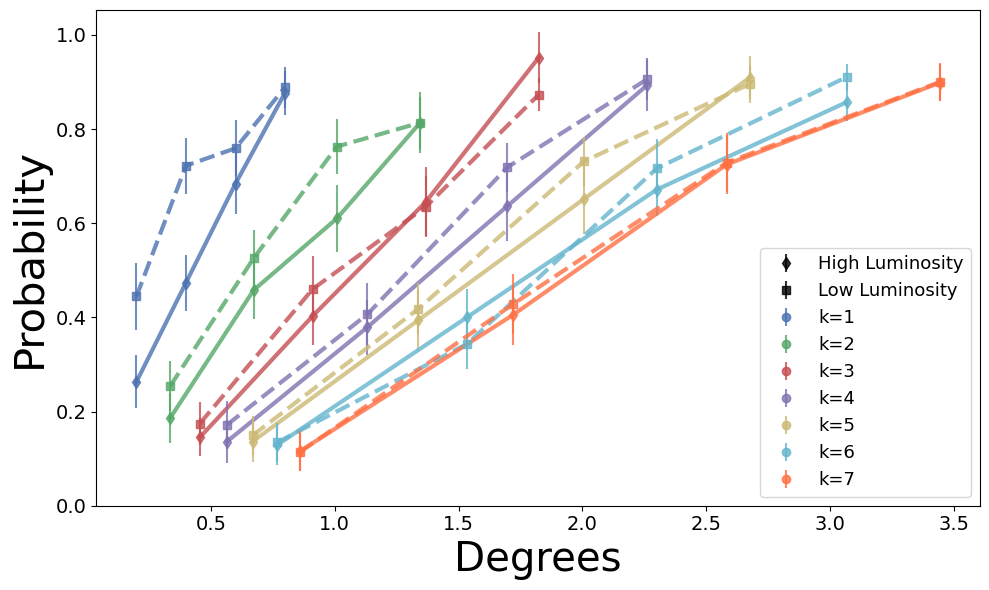

In [34]:
#Calculate relevant values
chi_squared = kNN_chi_squared(outputhigh,outputlow,covhigh,covlow,concatenate=True)
chi_strnew = 'reduced chi_squared: '+ str(round(chi_squared,5)) + '/'+ str(len(angles)*len(kneighbors)) + ' = ' + str(round(round(chi_squared,5)/(len(angles)*len(kneighbors)),5))

# Set up the main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the main plot
ax.set_ylabel('Probability', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=14)

# ax.set_title('CDF of Angular Separation: High vs. Low mass AGN', fontsize=14)


# ax.set_title('CDF of Angular Separation: High vs. Low ' + 'Black Hole Mass' + ' AGN: ' , fontsize=14)
# ax.set_title('CDF of Angular Separation: Full catalog vs. randoms: ' + str(round(zmin,4)) + "-" + str(round(zmax,4)) , fontsize=14)

ax.set_xlabel('Degrees', fontsize=29)

colors = [
    "#4C72B0",  # Blue
    "#55A868",  # Green
    "#C44E52",  # Red
    "#8172B2",  # Muted Purple
    "#CCB974",  # Muted Yellow
    "#64B5CD",  # Light Blue
    "#FF7043",  # Orange-Red
    "#8C8C8C",  # Gray
]

legend_created = False;

for ind,neighbor in zip(np.arange(len(kneighbors)),kneighbors) :  
    anglemax = angles[-1] * 180/(math.pi) * np.sqrt(neighbor)
    anglemin = angles[0] * 180/(math.pi) * np.sqrt(neighbor)
    scaled_angles = angles * 180 / (math.pi) * math.pow(neighbor,3/4)
    
    # Calculate relevant values for each neighbor
    differr = kNN_diff_error(outputhigh[ind], outputlow[ind], errhigh[ind], errlow[ind], single_neighbor=True)
    # Plot for each neighbor
        
    ax.errorbar(scaled_angles, outputhigh[ind], yerr=errhigh[ind], fmt='d', alpha=0.8, color=colors[neighbor-1])
    ax.errorbar(scaled_angles, outputlow[ind], yerr=errlow[ind], fmt='s', alpha=0.8, color=colors[neighbor-1])
    
    ax.plot(scaled_angles, outputhigh[ind], '-', lw = 3, alpha=0.8, color=colors[neighbor-1])
    ax.plot(scaled_angles, outputlow[ind], '--', lw=3, alpha=0.8, color=colors[neighbor-1])
    if not legend_created:
        ax.errorbar([], [], yerr=[], fmt='d', alpha=0.8, color='black', label='High Luminosity')
        ax.errorbar([], [], yerr=[], fmt='s', alpha=0.8, color='black', label='Low Luminosity')
        for i in kneighbors-1:
            ax.errorbar([], [], yerr=[], fmt='o', alpha=0.8, color=colors[i], label=f'k={i+1}')
        legend_created = True
        
ax.legend(loc='lower right', fontsize=13)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

# plt.text(anglemax-(.3*math.sqrt(kneighbors[-1])), 0.1, chi_strnew, fontsize=9,bbox = dict(facecolor = 'white', alpha = 0.5))
# plt.text(2.4,.2, str(round(zmin,2)) + " < z < " + str(round(zmax,2)), fontsize = 20, bbox = dict(facecolor = 'white', alpha = 0.5))

plt.tight_layout()

# plt.savefig('luminosity CDF-low redshift.pdf', format='pdf')

plt.show()



# print(f"The scale is {scale_kpc_per_degree.value:.2f} kpc/degree at z={z}.")